# **Marketing Campaign Analysis**


## Problem Definition:
- Segment Customers into clusters or groups that allow the business to understand their client base (existing and future) in order to tailor marketing and other strategy to them.


### **The Context:**

 - Unsupervised learning tools in Data Science give us the ability to identify patterns in the data that reveal things about customer preferences and customer groups. This is called Customer Segmentation. Segmented marketing campaigns receive a higher return on investment when compared to non-segmented marketing campaigns.

### **The objective:**

 - By performing a customer segmentation on our data base, we will identify the behavioral patterns of our customer as well as the profiles behind these behaviors

### **The key questions:**

- Who is engaging most with the company?
- What do our "best" customers look like?
-

### **The problem formulation**:

- Who are our current and potential customers and how can we tailer our services to them, give them better service and increase company reveue?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

In [1]:
!pip install scikit-learn-extra

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import datetime
from scipy import stats
import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/marketing_campaign+%284%29 (1).csv')

data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
Mounted at /content/drive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/marketing_campaign+%284%29 (1).csv')

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [3]:
# Change DT_Customer to Date-Time Object and create another column with just month
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


# Change Year_birth to age (The dataset is from 2016)

data['Year_Birth'] = 2016 - data['Year_Birth']
data.rename(mapper = {"Year_Birth": 'Age'}, axis = 1, inplace = True)
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,59,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,62,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,51,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,32,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,35,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [4]:
# Generate Summary Statistics:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Age,2240.0,47.194196,11.984069,20.0,39.00,46.0,57.00,123.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
# Find the number of unique values in each column:

data.nunique()

ID                     2240
Age                      59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [6]:
# Find unique values in "Marital Status" and "Education" column:

print(data['Marital_Status'].value_counts())
print(data['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


#Observations:
- It seems like the columns showing expenditure on different products are all right skewed which may be that the distribution is disrupted by heavier spenders.
- Based on the median the item category on which people spend the most money appears to be wine.
- The campaigns seemed to hover around 7% conversion rate after campaign 2.
- Most customers haven't complained within the past year. Only 0.9% of them have.
- Average age of a customer appears to be around 46 or 47.
- There are a few useless values for 'Marital Status'.
- 2n Cycle is equivalent to a masters program
- We have 2240 customers in the database with 27 different columns
- Year birth might be more easily interpreted as an age instead of a year
- Education and Marital status may be converted to numbers for analysis.
- The income column is has 24 NaN Values. These will likely have to be imputed with the median since income is typically a skewed distribution in most datasets.
- There are no duplicated rows in the dataset
- 'DT_Customer' is an object type when it should be a Date Time Object
- 'Education' and 'Marital Status' will have to be encoded in our preprocessing step

####Some Preprocessing:

In [7]:
# Simplify Marital Statuses and Education

data['Marital_Status'].replace(to_replace = ['Alone', 'Absurd', 'YOLO'], value = 'Single', inplace = True )
data['Marital_Status'].value_counts()

# Combine '2n Cycle' with Masters

data['Education'].replace(['2n Cycle','Master', 'PhD'], 'Graduate Student' , inplace = True)
data['Education'].replace('Graduation', 'Bachelors', inplace = True)
data['Education'].replace('Basic', 'High School', inplace = True)

# Check values for 'Education'

data['Education'].value_counts()

Bachelors           1127
Graduate Student    1059
High School           54
Name: Education, dtype: int64

###Univariate Analysis:

In [8]:
# Create function for efficient graphing.

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe

    feature: dataframe column

    figsize: size of figure (default (12, 7))

    kde: whether to the show density curve (default False)

    bins: number of bins for histogram (default None)

    """
    f2, (ax_box2, ax_hist2) = plt.subplots(

        nrows = 2,      # Number of rows of the subplot grid=2

        sharex = True,  # x-axis will be shared among all subplots

        gridspec_kw = {"height_ratios": (0.25, 0.75)},

        figsize = figsize,

    )
    # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

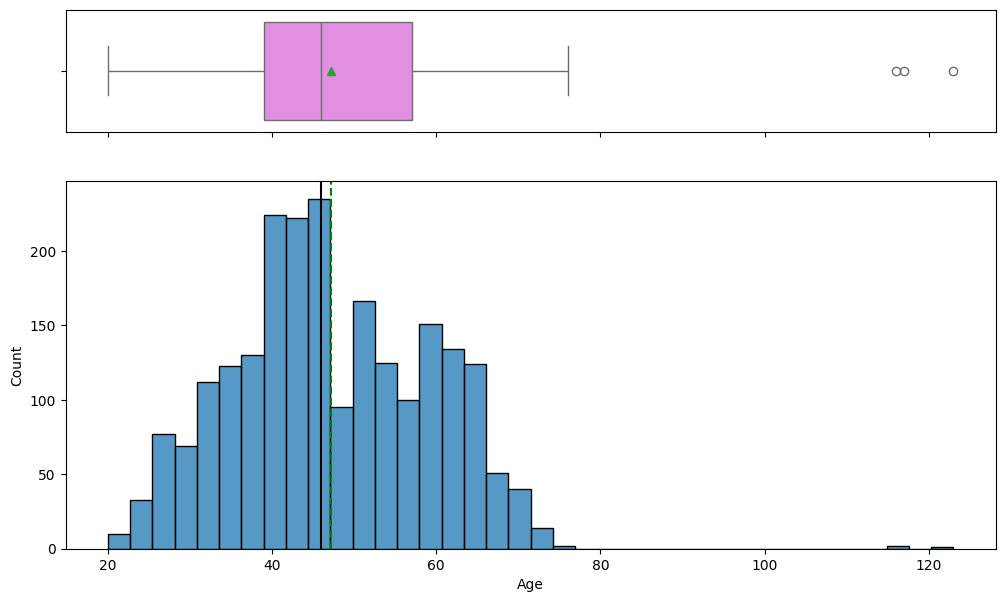

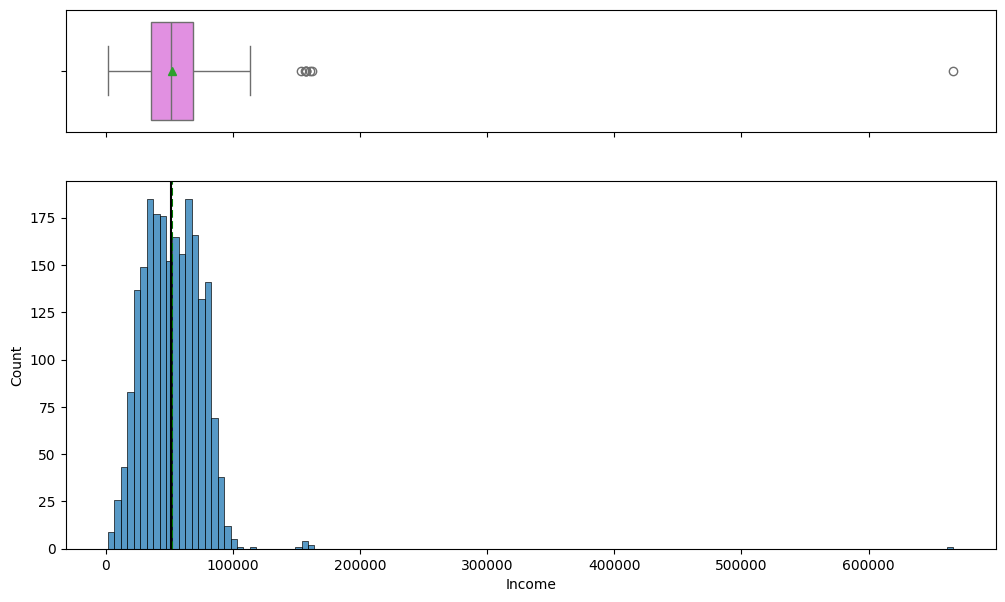

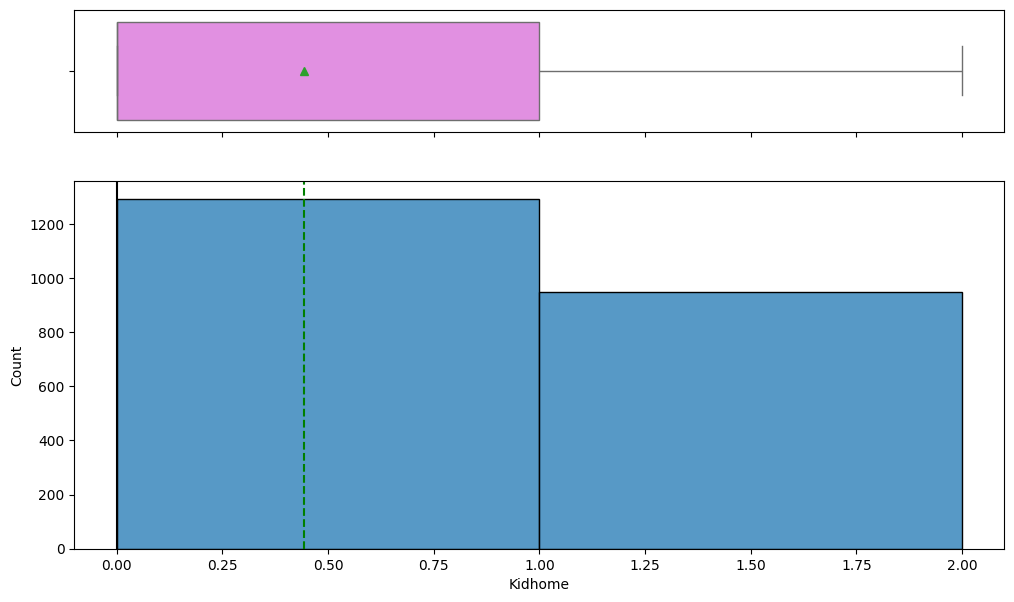

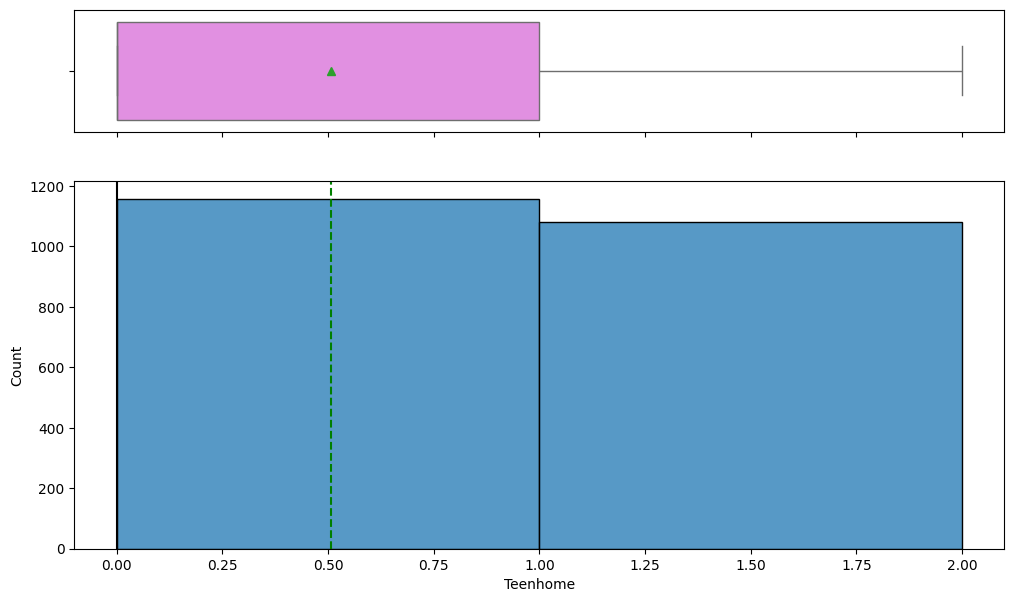

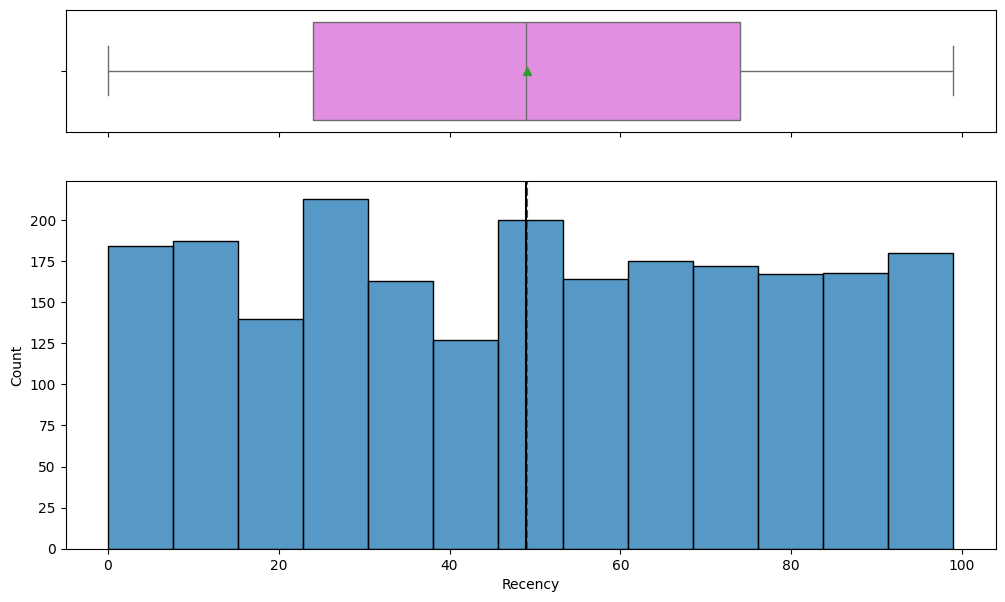

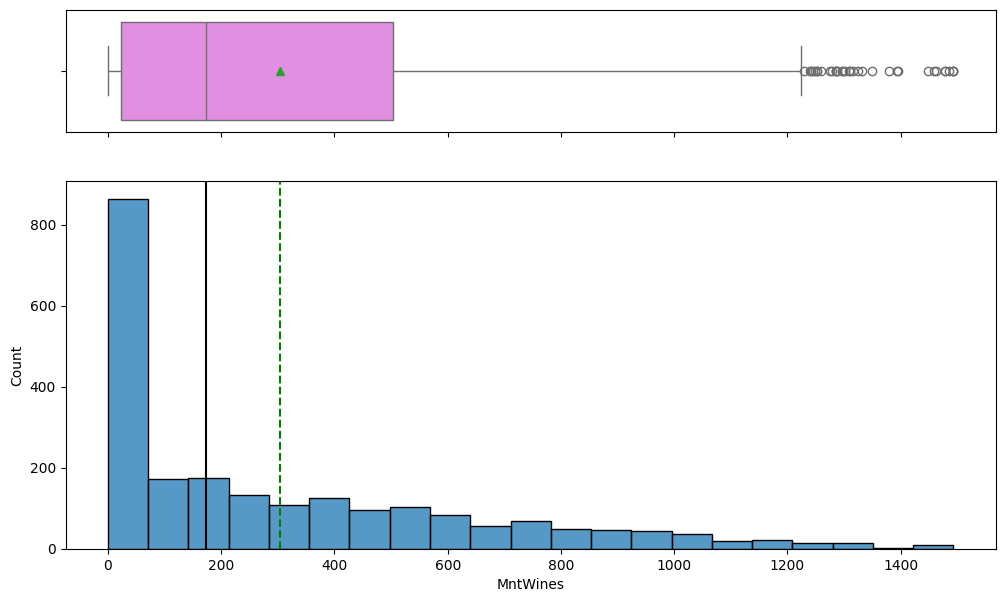

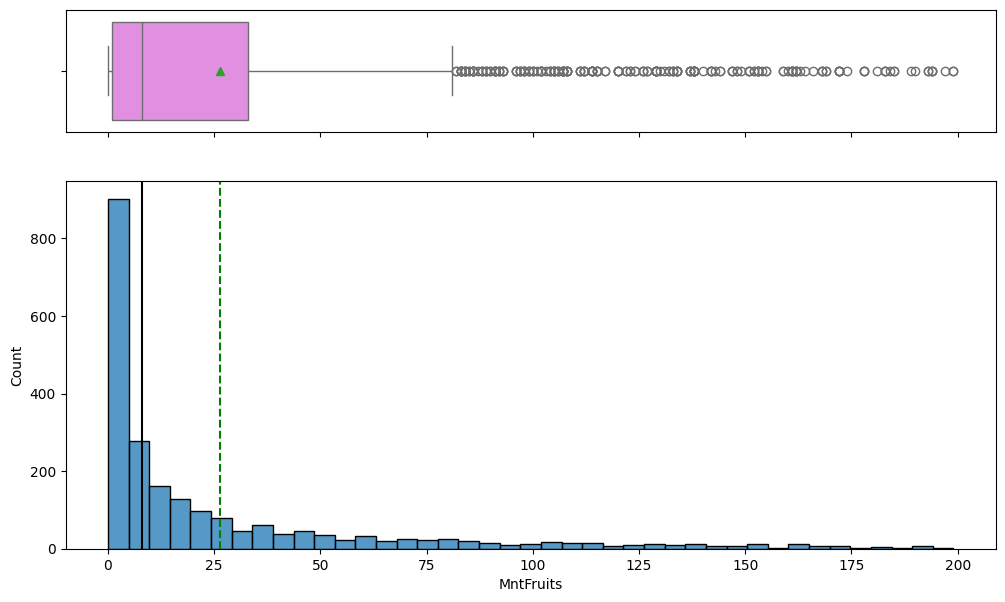

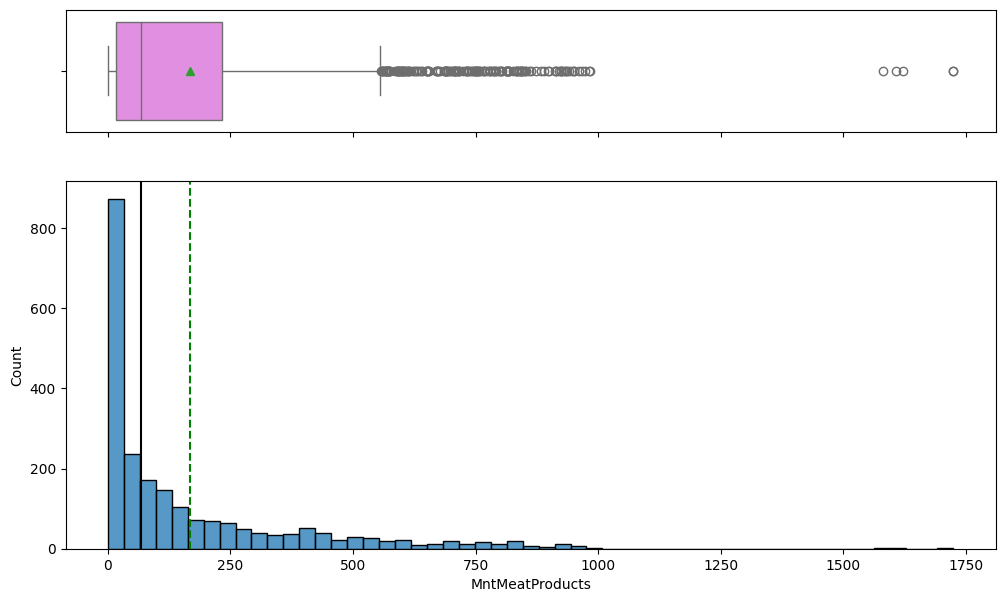

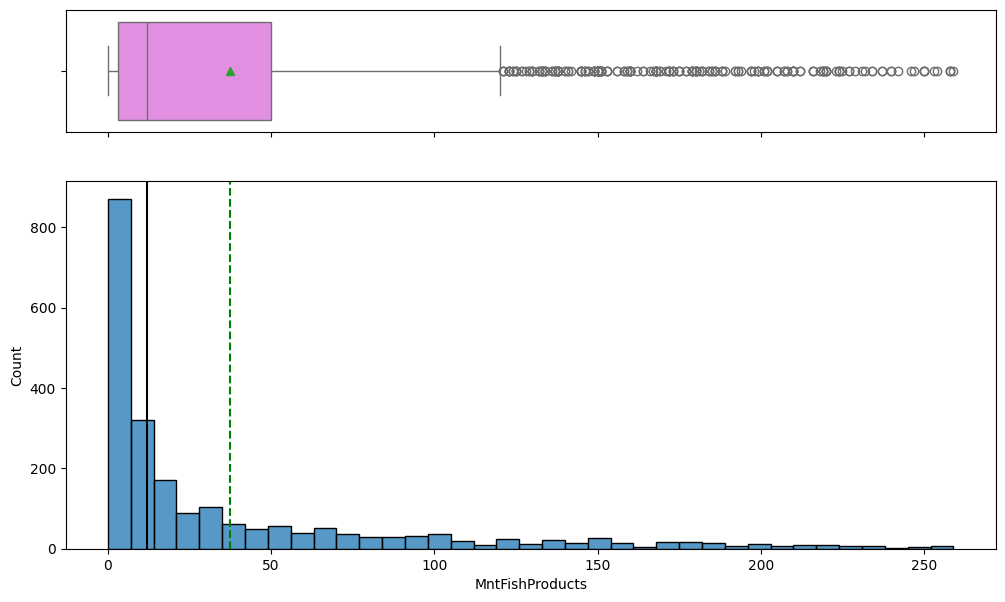

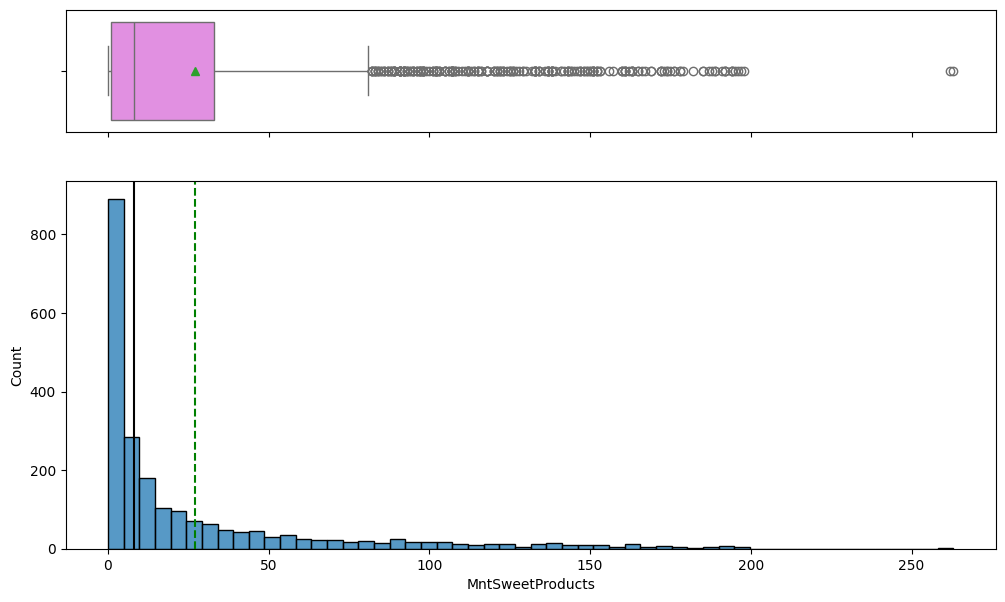

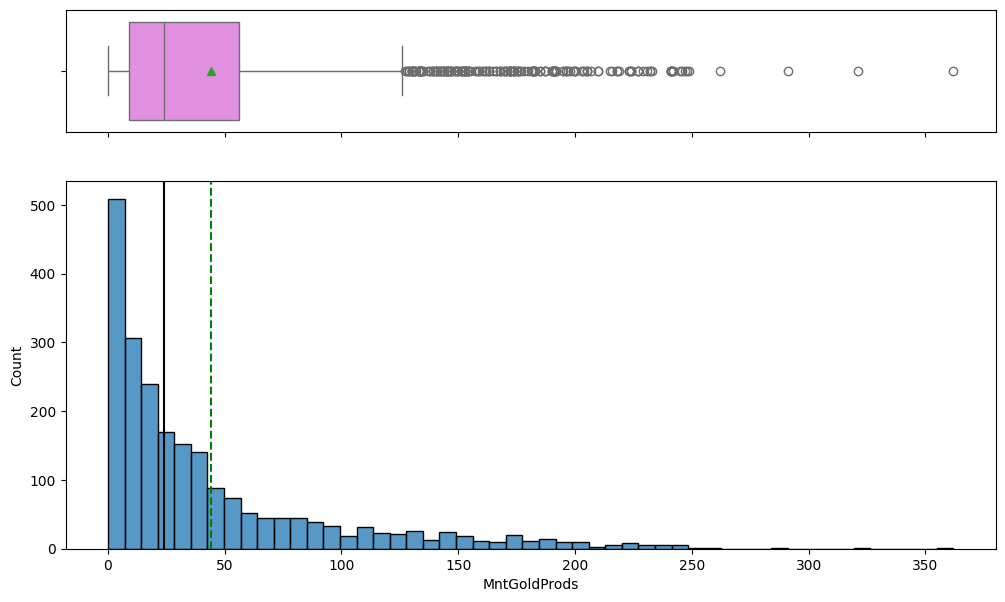

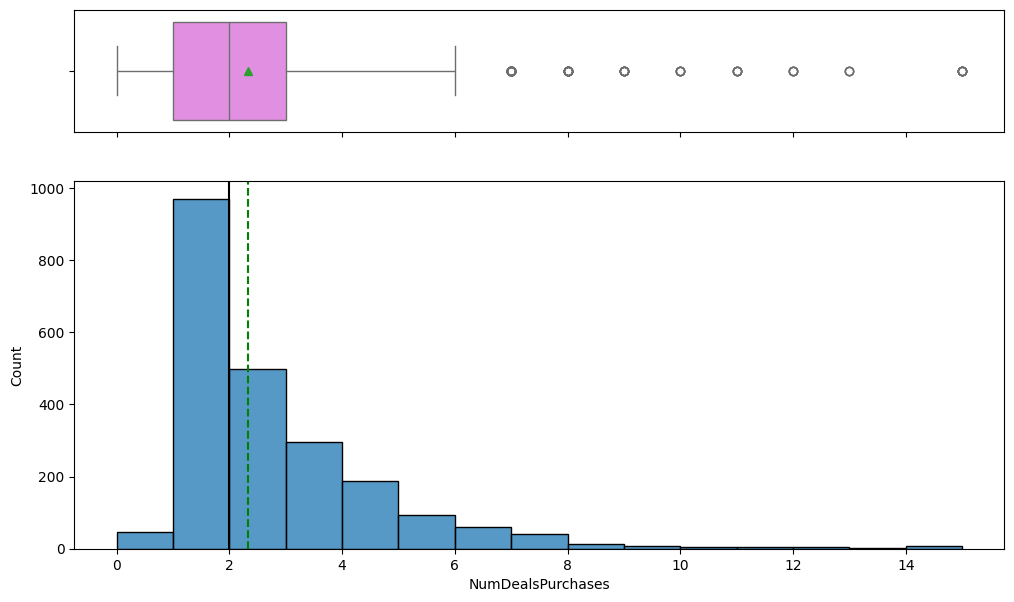

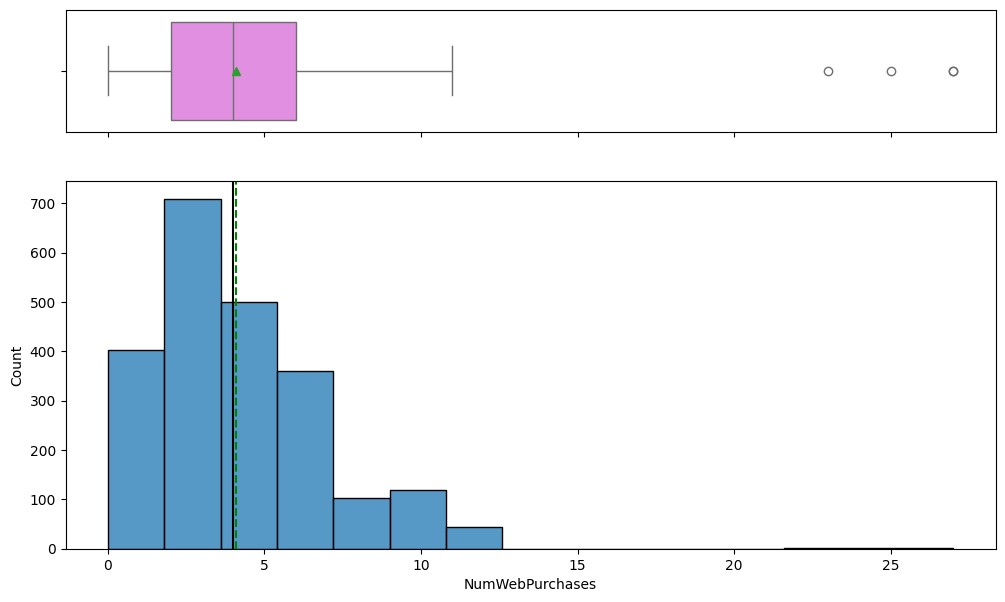

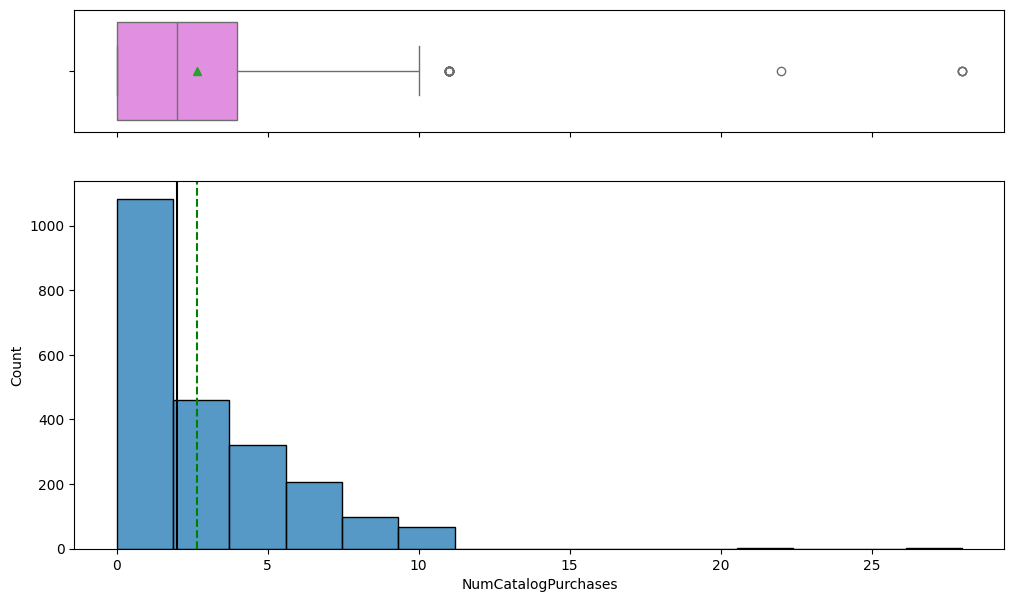

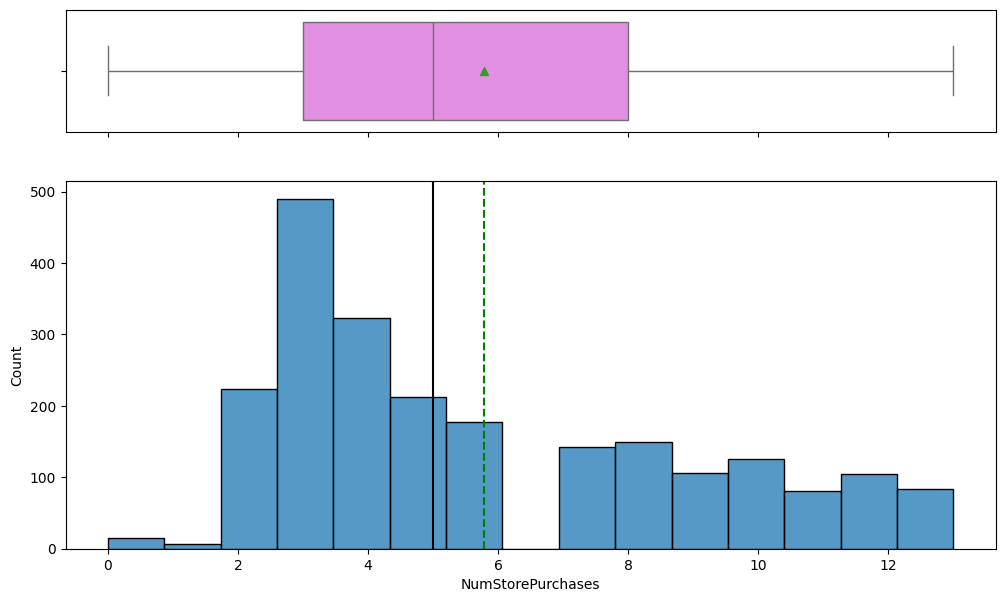

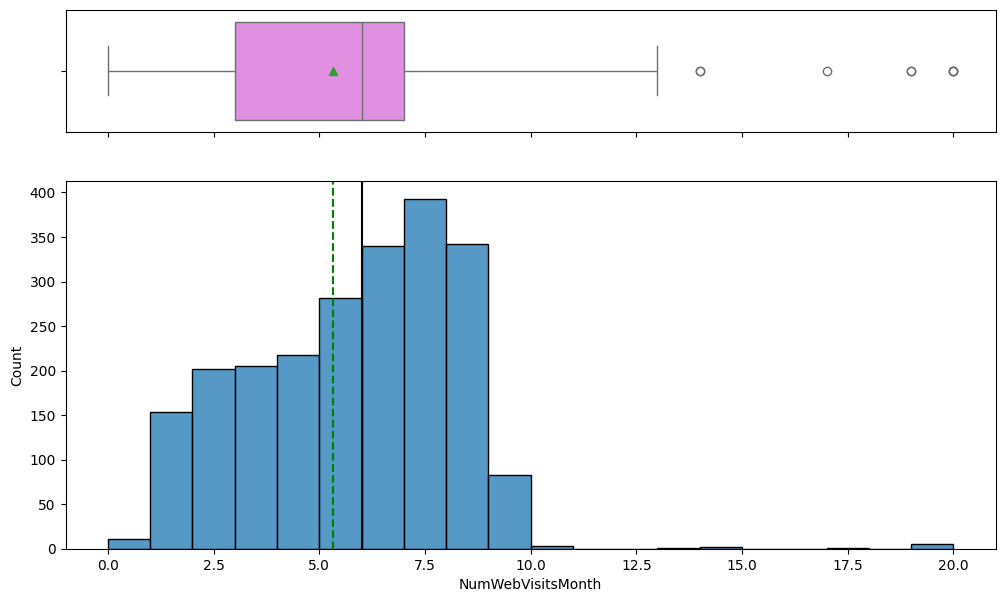

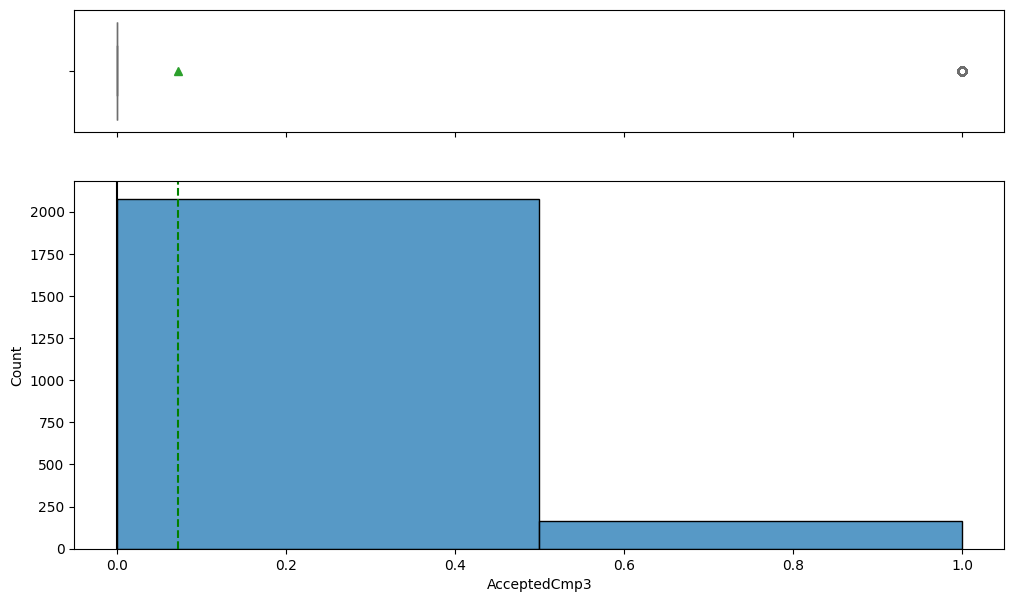

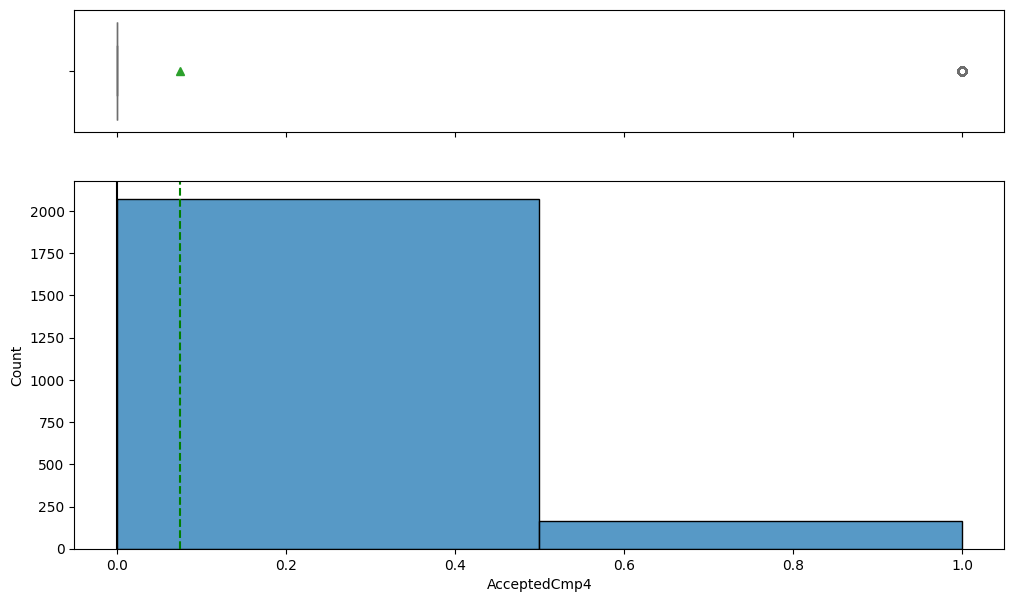

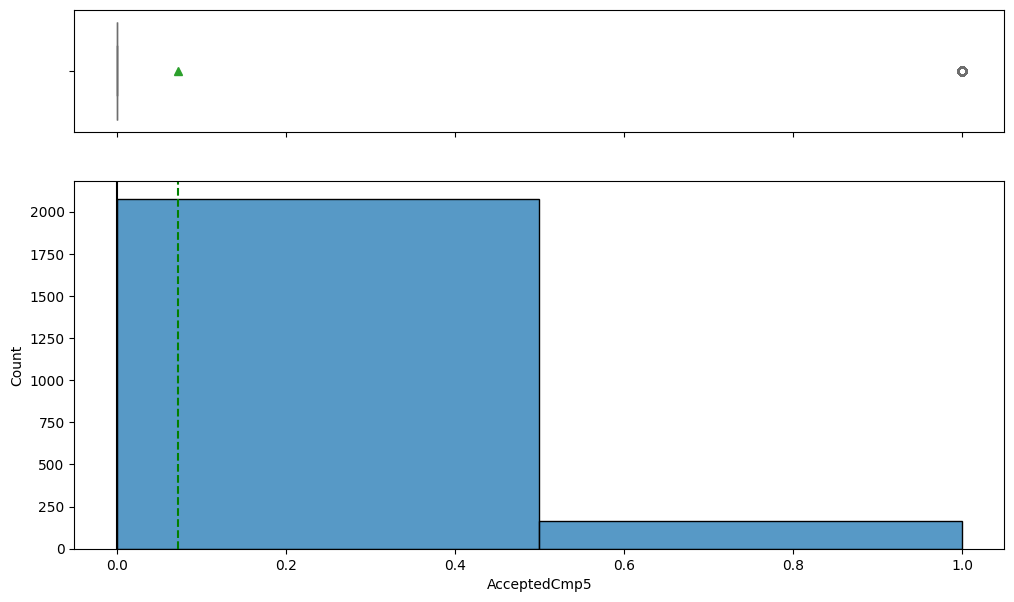

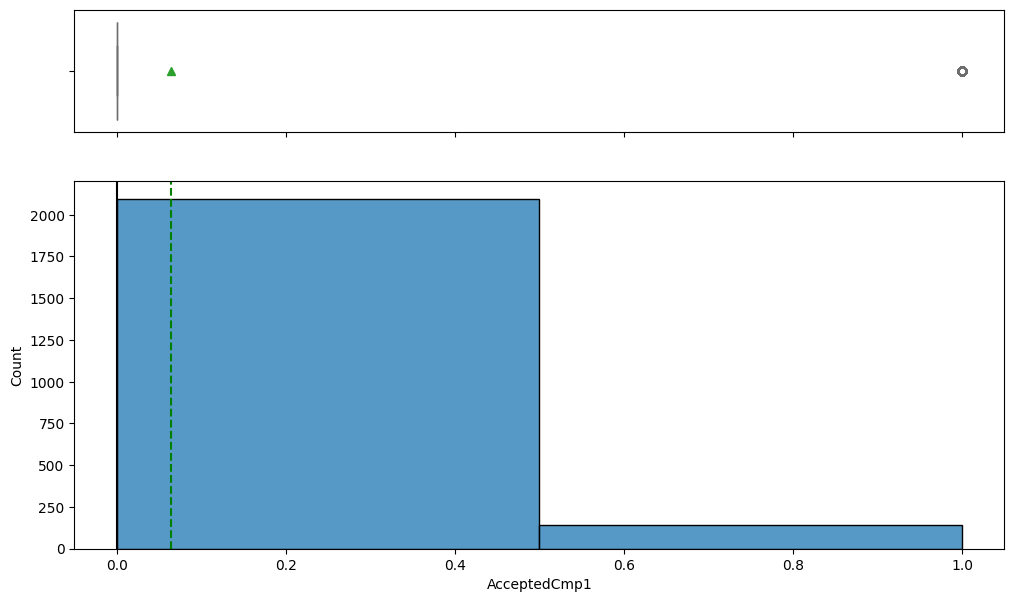

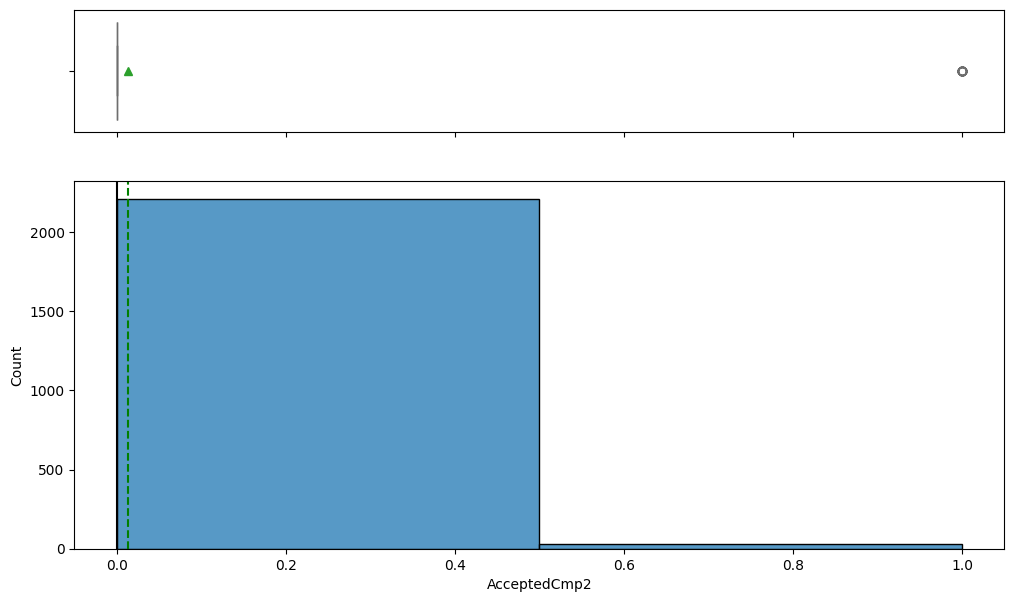

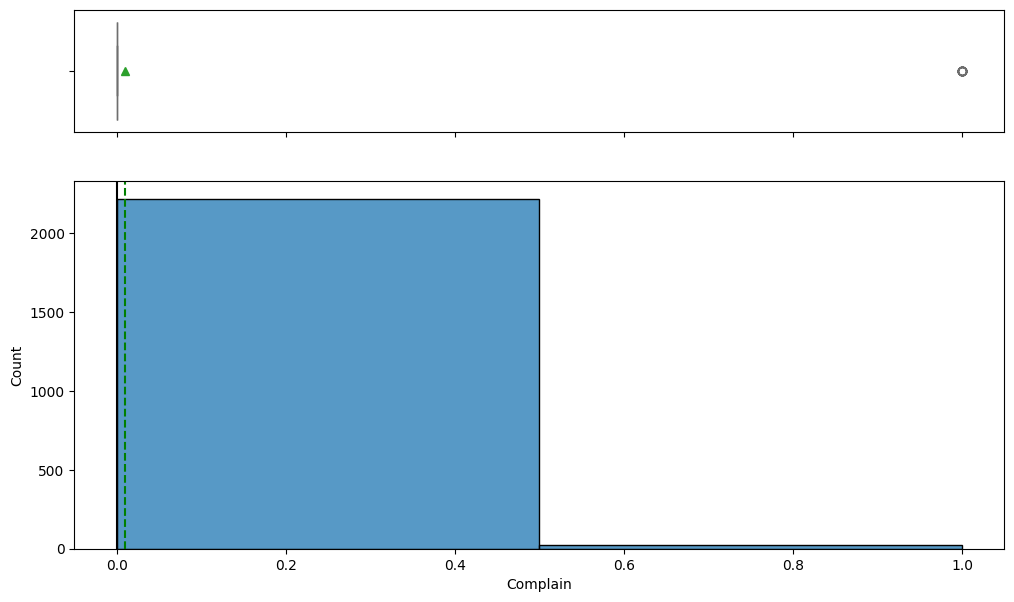

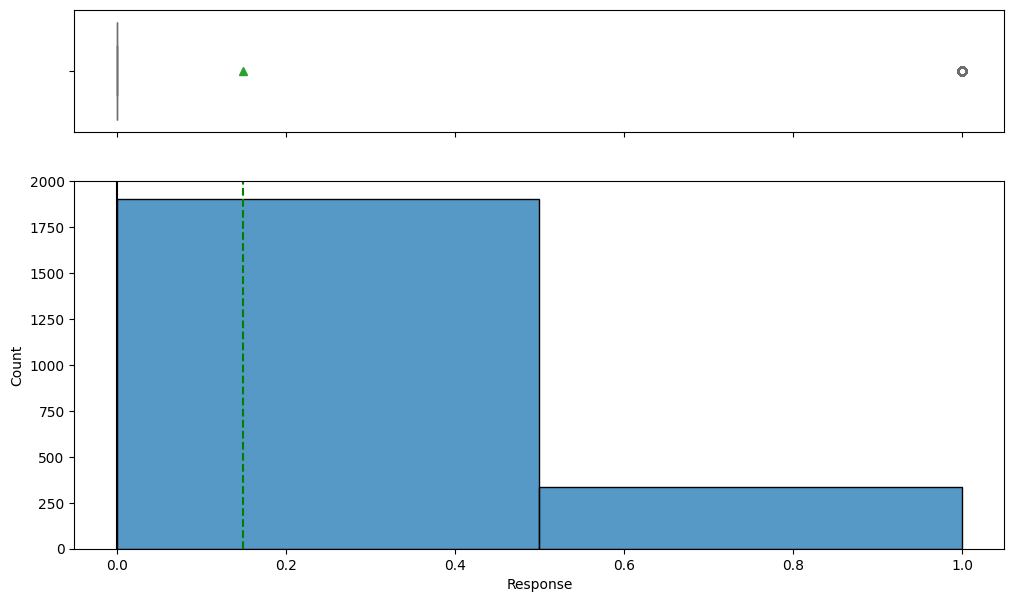

In [9]:
# Graph numeric data:

numeric=data.select_dtypes(exclude=['object', 'datetime'])
numeric.drop('ID', axis =1, inplace = True)

for i in numeric.columns:
  if i == 'NumWebVisitsMonth':
    histogram_boxplot(data = data, feature = i, bins = 20)
  elif i.split('C')[0]=='Accepted' or i in ['Response', 'Complain', 'Teenhome', 'Kidhome']:
    histogram_boxplot(data = data, feature = i, bins = 2)
  elif i in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    histogram_boxplot(data = data, feature = i, bins = 15)
  else:
    histogram_boxplot(data = data, feature = i)
  plt.show()

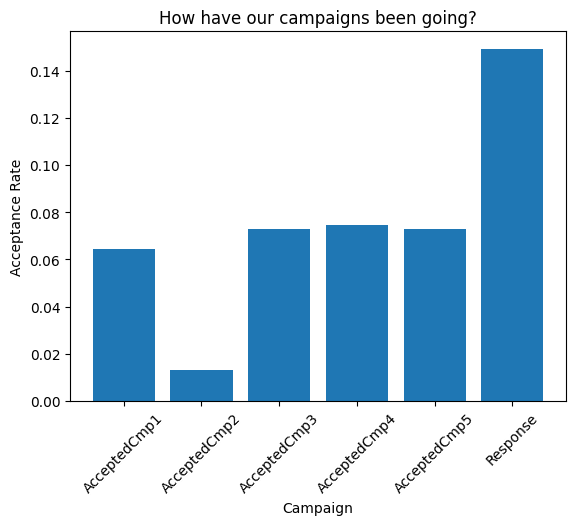

In [10]:
# Find acceptance Rate of Campaigns

columns = [ 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
AccptRate = []
for i in columns:
  a = data[i].mean()
  AccptRate.append(a)

rates =  list(zip(columns,AccptRate))
AccptRate = pd.DataFrame(rates, columns = ['campaign', 'acceptance'])

plt.bar(x = AccptRate['campaign'], height = AccptRate['acceptance'])
plt.ylabel('Acceptance Rate')
plt.xlabel('Campaign')
plt.xticks(rotation=45)
plt.title('How have our campaigns been going?')
plt.show()

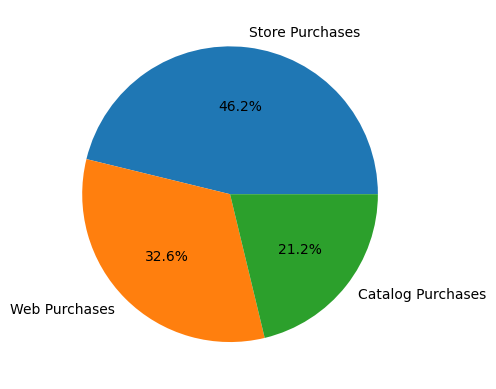

In [51]:
# Which is our most popular channel?

Channel = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
TotalPurchases = []
for i in Channel:
  total = data[i].sum()
  TotalPurchases.append(total)

zipped = (list(zip(Channel, TotalPurchases)))

channels = pd.DataFrame(zipped, columns = ['Channel', 'TotalPurchases'])

plt.pie(channels['TotalPurchases'],
        labels=['Store Purchases', 'Web Purchases', 'Catalog Purchases'],
        autopct='%1.1f%%')
plt.show()

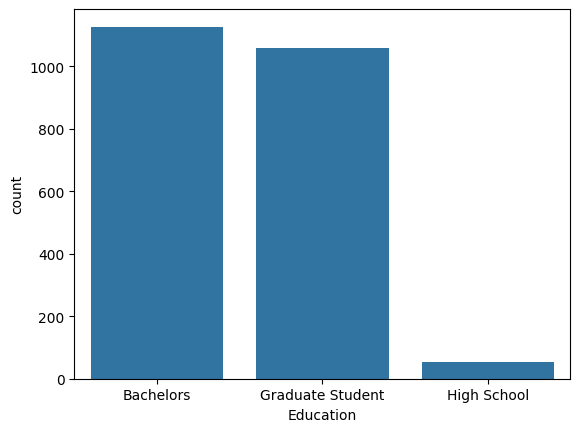

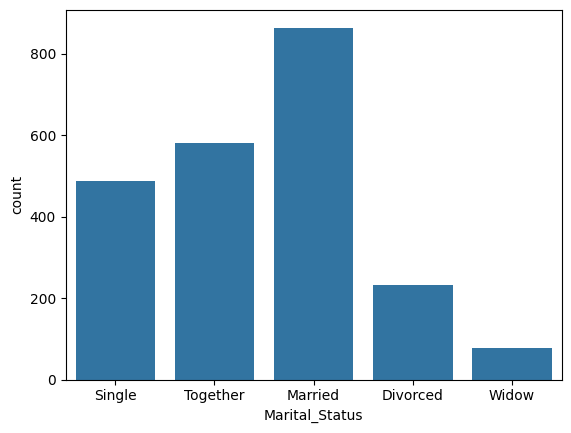

In [12]:
# Perform Univariate analysis on categorical variables:
obj =data.select_dtypes(include=['object', 'datetime'])

for i in ['Education', 'Marital_Status']:
  sns.countplot(data = obj, x = i)
  plt.show()

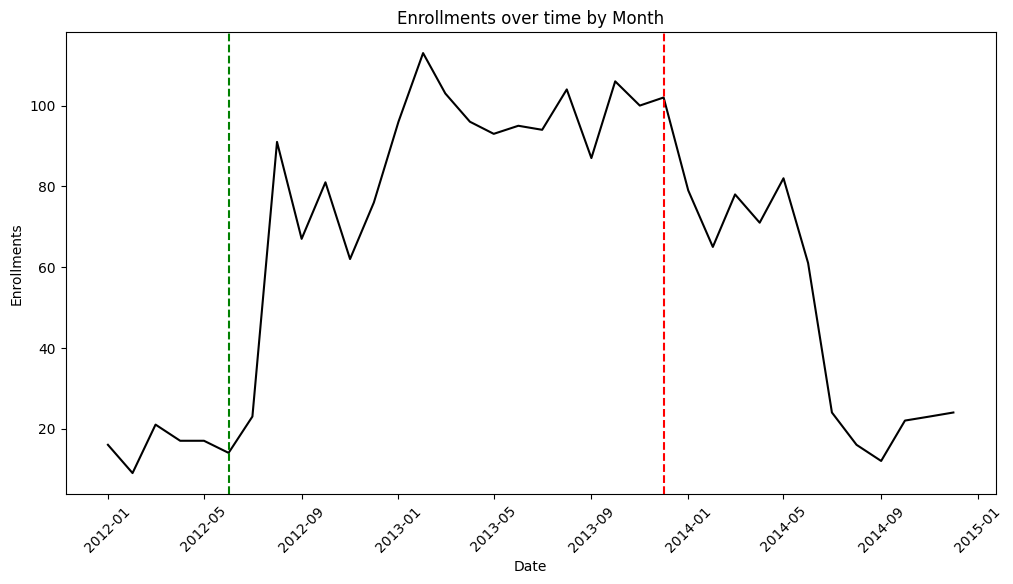

In [13]:
# Plot enrollments over time (in months):

enrollment = pd.DataFrame(data['Dt_Customer'].value_counts()).reset_index()
enrollment.columns = ['Date', 'Enrollments']

enrollment['Date'] = pd.to_datetime(enrollment['Date'])
enrollment['Date'] = enrollment['Date'].dt.strftime('%m-%Y')
enrollment['Date'] = pd.to_datetime(enrollment['Date'])

plt.figure(figsize = (12, 6))
sns.lineplot(data= enrollment, x = enrollment['Date'], y = enrollment['Enrollments'], estimator = 'sum', ci = None, c = 'black')
plt.xticks(rotation = 45)
plt.title('Enrollments over time by Month')

downturn = pd.to_datetime('2013-12')
upturn = pd.to_datetime('2012-06')

# Add the vertical lines
plt.axvline(x=downturn, color='red', linestyle='--')
plt.axvline(x=upturn, color='green', linestyle='--')

plt.show()

In [14]:
# What are our most popular products?

Mntcols = []

for i in data.columns:
  a = [*i][0:3]
  if a == ['M', 'n', 't']:
    Mntcols.append(i)


In [15]:
# Calculate Outliers for each variable:

def num_outliers(dataset, var):
  numerics = dataset.select_dtypes(include = ['int64', 'float64'])
  quartiles = numerics[var].quantile([0.25, 0.75])
  iqr = quartiles[0.75] - quartiles[0.25]
  outlier_identifier = iqr*1.5

  count = len(dataset.loc[(dataset[var] > quartiles[0.75] + outlier_identifier) | (dataset[var] < quartiles[0.25] - outlier_identifier)].index)
  return print(var, '-', count)


for i in data.select_dtypes(include=['int64', 'float64']).columns:
  num_outliers(data, i)

ID - 0
Age - 3
Income - 8
Kidhome - 0
Teenhome - 0
Recency - 0
MntWines - 35
MntFruits - 227
MntMeatProducts - 175
MntFishProducts - 223
MntSweetProducts - 248
MntGoldProds - 207
NumDealsPurchases - 86
NumWebPurchases - 4
NumCatalogPurchases - 23
NumStorePurchases - 0
NumWebVisitsMonth - 8
AcceptedCmp3 - 163
AcceptedCmp4 - 167
AcceptedCmp5 - 163
AcceptedCmp1 - 144
AcceptedCmp2 - 29
Complain - 21
Response - 334


### **Observations:**

- The age category has a few individuals over the age of 100. While this is possible, it is most likely a data entry error. In any case, it's not really worth figuring out the buying habits of those over 100 since the IQR of our customer base is between the ages of 40-60. These individuals should be removed from the dataset
- One extreme outlier makes more than 600,000. Again, this is potentially a data entry error. This individual should be removed from the dataset since they are an outlier
- The kid and teen columns can likely be combined into a column called 'Dependents' since most of their values are 0
- 'Recency' appears to be uniformly distributed between 0 and 100 days since purchase.
- The campaigns don't appear to be effective in getting customers to accept offers. I would wonder if there is a particular type of customer that accepts the offers.
- The company is trying to recover from an unexplained drop in enrollments after a 2-year high
- A few outliers. These will have to be dealt with before the PCA since PCA is sensitive to outliers
- The store is our most popular channel followed by the web and then the catalog

#Bivariate Analysis:

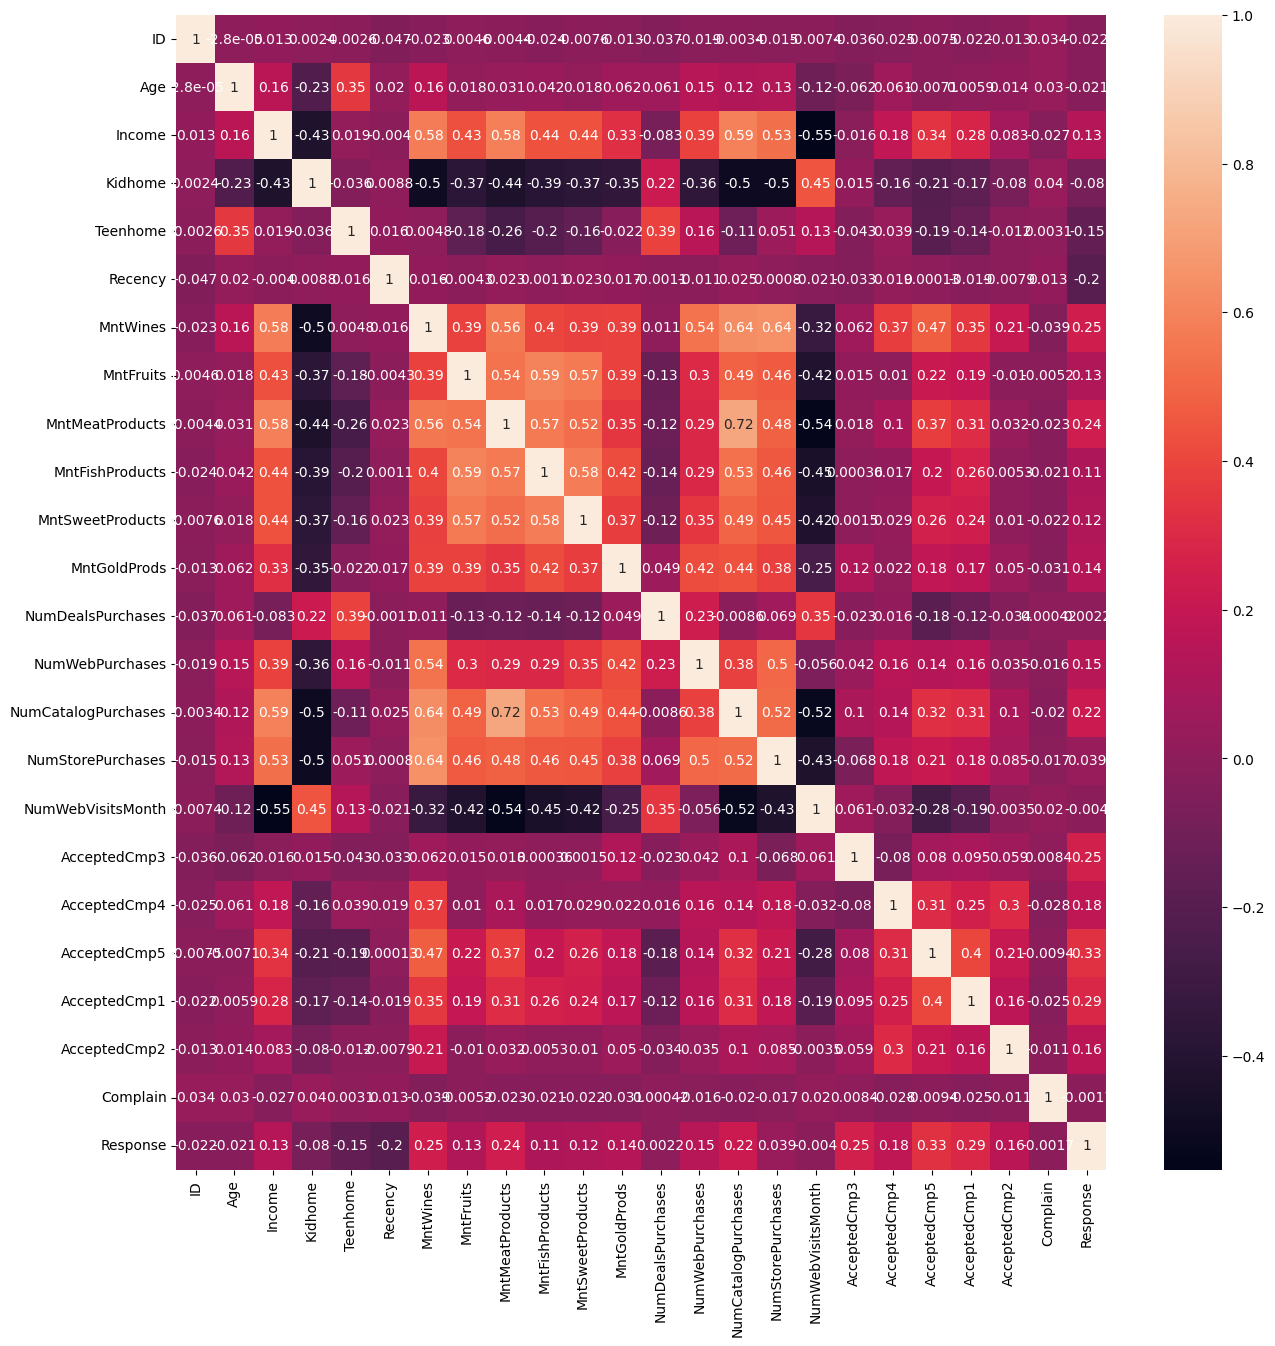

In [16]:
# Generate a correlation heatmap

plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

Text(0.5, 1.0, 'Income Vs Expenses')

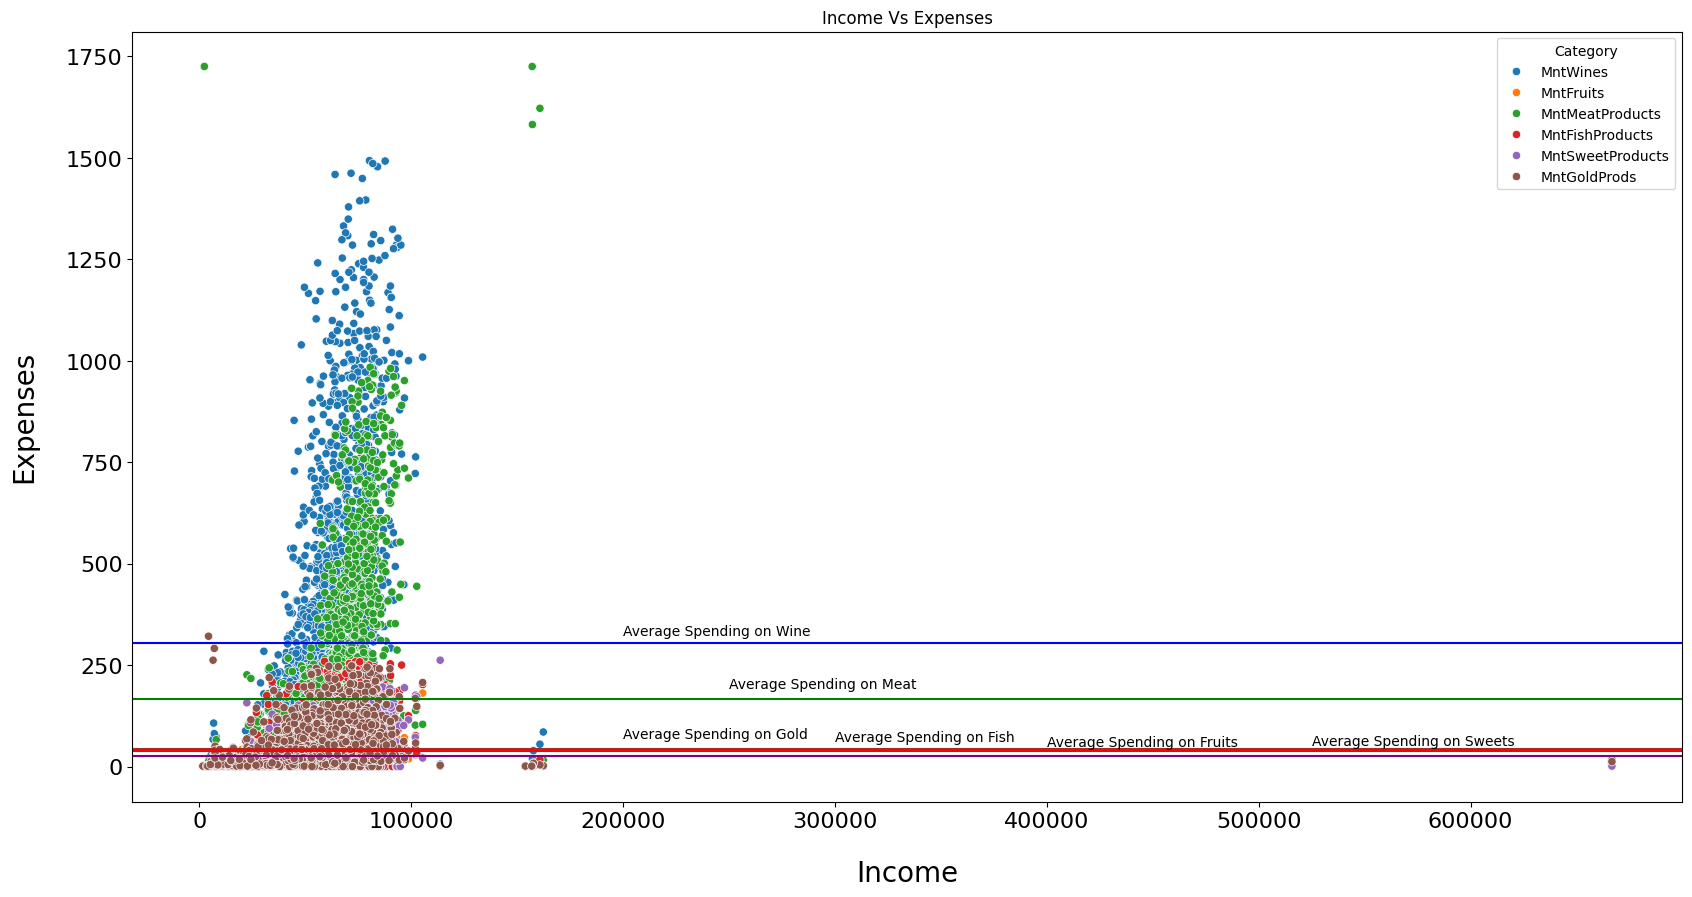

In [37]:
# plot correlation between income and expenditure

# Create duplicate dataframe for manipulation
df=pd.DataFrame()
df['ID']=data['ID'].copy()
df['Income']=data['Income'].copy()

for i in Mntcols:
  df[i] = data[i].copy()
melted_data = pd.melt(df, id_vars=['ID', 'Income'], var_name='Category', value_name='Spending')

plt.figure(figsize=(20, 10))
sns.scatterplot(data=melted_data,x="Income",y="Spending",hue="Category")

# Create and label mean lines:
  # Wines
winelabel='Average Spending on Wine'
avgwine=data['MntWines'].mean()
plt.axhline(y=avgwine,color='blue')
plt.text(x=200080,y=(avgwine+20),s=winelabel)


  # Fruits
fruitslabel='Average Spending on Fruits'
avgfruit=data['MntFruits'].mean()
plt.axhline(y=avgfruit,color='yellow')
plt.text(x=400000,y=(avgfruit+25),s=fruitslabel)

  # Meat
meatlabel='Average Spending on Meat'
avgmeat=data['MntMeatProducts'].mean()
plt.axhline(y=avgmeat,color='green')
plt.text(x=250000,y=(avgmeat+25),s=meatlabel)

  # Fish
fishlabel='Average Spending on Fish'
avgfish=data['MntFishProducts'].mean()
plt.axhline(y=avgfish,color='red')
plt.text(x=300000,y=(avgfish+25),s=fishlabel)

  # Sweets
sweetslabel='Average Spending on Sweets'
avgsweets=data['MntSweetProducts'].mean()
plt.axhline(y=avgsweets,color='purple')
plt.text(x=525000,y=(avgsweets+25),s=sweetslabel)

  # Gold
goldlabel='Average Spending on Gold'
avggold=data['MntGoldProds'].mean()
plt.axhline(y=avggold,color='brown')
plt.text(x=200000,y=(avggold+25),s=goldlabel)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Income", fontsize=20, labelpad=20)
plt.ylabel("Expenses", fontsize=20, labelpad=20)
plt.title("Income Vs Expenses")

####Observations:
- Easy to observe pattern between Income and Expenditure

#Data Processing:

In [125]:
# Impute median for missing values in the income column:

# Create instance of SimpleImputer
impute_med = SimpleImputer(strategy = "median", missing_values= np.nan)

new = pd.DataFrame(data['Income'])

income_impute = impute_med.fit_transform(new)

data['Income'] = income_impute

# Check to see if there are any more null values
data.isnull().sum()

ID                     0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [126]:
# Create column for total Expenditure
Mntcols = []

for i in data.columns:
  a = [*i][0:3]
  if a == ['M', 'n', 't']:
    Mntcols.append(i)


data['TotalAmountSpent'] = 0

for i in Mntcols:
  data['TotalAmountSpent'] += data[i]

data[['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'TotalAmountSpent']].sample(10)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
239,8,0,5,7,0,2,22
2133,1,3,2,20,30,47,103
1183,6,12,3,21,6,40,88
1401,642,14,49,0,7,57,769
958,69,2,15,2,2,6,96
430,1248,16,349,43,16,16,1688
1052,1315,22,780,145,0,178,2440
245,11,0,5,0,0,1,17
514,284,0,55,0,6,52,397
1419,20,3,16,0,4,1,44


In [127]:
# Create column for total number of purchases

Numcols = []
for i in data.columns:
  a = [*i][0:3]
  if a == [*'NumWebVisitsMonth']:
    True
  elif a == ['N','u','m']:
    Numcols.append(i)

data['TotalNumPurchases'] = 0

for i in Numcols:
  data['TotalNumPurchases'] += data[i]


data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'TotalNumPurchases']].sample(13)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalNumPurchases
1937,3,11,2,8,8,32
2145,1,11,3,4,4,23
38,2,1,1,3,5,12
203,0,7,9,10,4,30
2124,2,1,0,4,5,12
1497,6,4,2,9,9,30
772,8,7,3,7,8,33
680,2,8,9,4,6,29
28,2,2,1,4,3,12
2157,1,1,0,3,3,8


In [128]:
# Create column for amount per purchase

data['AvgCostperCart'] = round((data['TotalAmountSpent'] / data['TotalNumPurchases']), 2)

data[['TotalAmountSpent', 'TotalNumPurchases', 'AvgCostperCart']].sample(13)

,TotalAmountSpent,TotalNumPurchases,AvgCostperCart
1340,320,19,16.84
1553,1033,16,64.56
1968,1429,23,62.13
1803,433,30,14.43
854,446,26,17.15
360,2153,24,89.71
1615,882,28,31.50
1586,169,19,8.89
678,172,21,8.19
513,1924,20,96.20


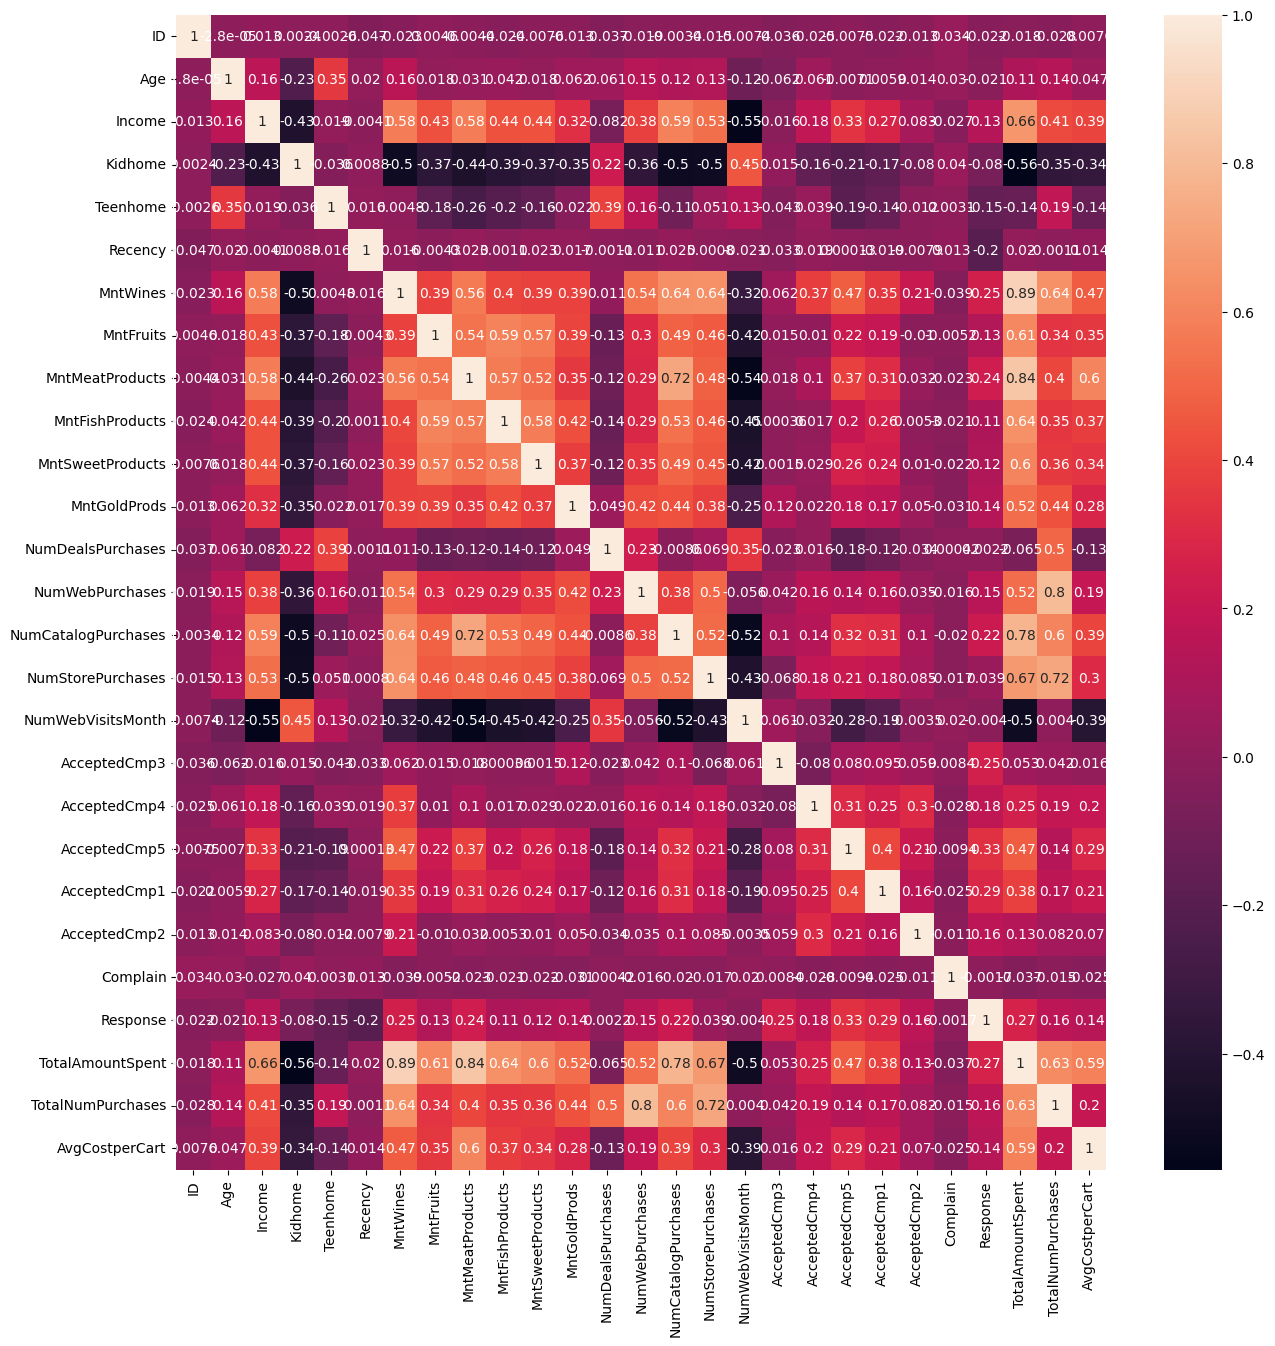

In [129]:
# Generate a correlation heatmap

plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- High Correlation between TotalAmountSpent and NumCatalogPurchases
  - The more you purchase from the catalog, the more you spend

#Preparation for Segmentation:

In [186]:
# Custom function for removing outliers using the IQR method

def outlier_imputer(dataset, var):
  quartiles = dataset[var].quantile([0.25, 0.75])
  iqr = quartiles[0.75] - quartiles[0.25]
  range = iqr*1.5

  to_impute_low = dataset.loc[dataset[var] < quartiles[0.25] - range].index
  to_impute_high = dataset.loc[dataset[var] > quartiles[0.75] + range].index

  for i in to_impute_low:
    dataset.loc[i,var] = (quartiles[0.75] - range)

  for i in to_impute_high:
    dataset.loc[i,var] = (quartiles[0.75] + range)

  return True


# Create new dataset for handling outliers:
data1=data.copy()

In [187]:
# Create column for number of campaigns accepted:

data1['AcceptedCmpTotal'] = 0

for i in range(1,6):
  data1['AcceptedCmpTotal'] += data1[f'AcceptedCmp{i}']

In [188]:
# Encode object type variables

data1['Marital_Status'].value_counts()

msdictionary = {'Married': 1, 'Together': 1, 'Divorced': 0, 'Widow': 0, 'Single': 0}
data1['Marital_Status'].replace(msdictionary, inplace = True)



# Since Education is Ordinal it can be transformed into a numerical values

EducationDictionary = {'High School': 1, 'Bachelors': 2, 'Graduate Student': 3}

data1['Education'].replace(EducationDictionary, inplace = True)
data1.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal
0,5524,59,2,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,32,50.53,0
1,2174,62,2,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,11,2.45,0
2,4141,51,2,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,25,31.04,0
3,6182,32,2,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,14,3.79,0
4,5324,35,3,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,24,17.58,0


In [189]:
# Create a column for household size

data1['Household'] = data1['Kidhome'] + data1['Teenhome'] + 1 # +1 inclues the customer as a household member

for index, row in data1.iterrows():
    if row['Marital_Status'] == 1:
        data1.loc[index, 'Household'] += 1
    else:
        data1.loc[index, 'Household'] += 0

data1[['Kidhome', 'Teenhome', 'Marital_Status', 'Household']].sample(10)

,Kidhome,Teenhome,Marital_Status,Household
271,1,0,0,2
1179,0,0,0,1
64,0,0,1,2
1803,1,1,0,3
2140,1,0,0,2
315,1,1,1,4
1666,0,2,1,4
889,0,0,0,1
1396,1,1,0,3
407,1,1,0,3


In [190]:
# Assign the ID to be the index so that I can profile the customers later:
data1.set_index("ID",drop=True,inplace=True)
data1.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal,Household
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,59,2,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,32,50.53,0,1
2174,62,2,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,11,2.45,0,3
4141,51,2,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,25,31.04,0,2
6182,32,2,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,14,3.79,0,3
5324,35,3,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,24,17.58,0,3


In [191]:
# Transform Dt_Customer into month joined and days since join

data1['Month'] = data1['Dt_Customer'].dt.month

# Create column for days since customer joined:

current_date = datetime.datetime(2016,1 ,1)
data1['DaysSinceJoin'] = (current_date - data1['Dt_Customer']).dt.days

data1.drop('Dt_Customer', axis = 1, inplace = True)
data1.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal,Household,Month,DaysSinceJoin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,59,2,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,32,50.53,0,1,4,1362
2174,62,2,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,11,2.45,0,3,8,516
4141,51,2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,25,31.04,0,2,8,863
6182,32,2,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,14,3.79,0,3,10,456
5324,35,3,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,24,17.58,0,3,1,712


In [192]:
# Now that variables have been converted to a numeric style, outliers should be modified or removed

behavioral = ['Recency','NumWebPurchases', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
              'TotalAmountSpent', 'TotalNumPurchases', 'AvgCostperCart']

for i in data1.columns:
  if i in behavioral:
    print("before impute:", num_outliers(data1, i))
    outlier_imputer(data1, i)
    print("after impute:", num_outliers(data1, i))

Recency - 0
before impute: None
Recency - 0
after impute: None
MntFruits - 227
before impute: None
MntFruits - 0
after impute: None
MntMeatProducts - 175
before impute: None
MntMeatProducts - 0
after impute: None
MntFishProducts - 223
before impute: None
MntFishProducts - 0
after impute: None
MntSweetProducts - 248
before impute: None
MntSweetProducts - 0
after impute: None
MntGoldProds - 207
before impute: None
MntGoldProds - 0
after impute: None
NumDealsPurchases - 86
before impute: None
NumDealsPurchases - 0
after impute: None
NumWebPurchases - 4
before impute: None
NumWebPurchases - 0
after impute: None
NumCatalogPurchases - 23
before impute: None
NumCatalogPurchases - 0
after impute: None
NumStorePurchases - 0
before impute: None
NumStorePurchases - 0
after impute: None
NumWebVisitsMonth - 8
before impute: None
NumWebVisitsMonth - 0
after impute: None
TotalAmountSpent - 3
before impute: None
TotalAmountSpent - 0
after impute: None
TotalNumPurchases - 3
before impute: None
TotalNum

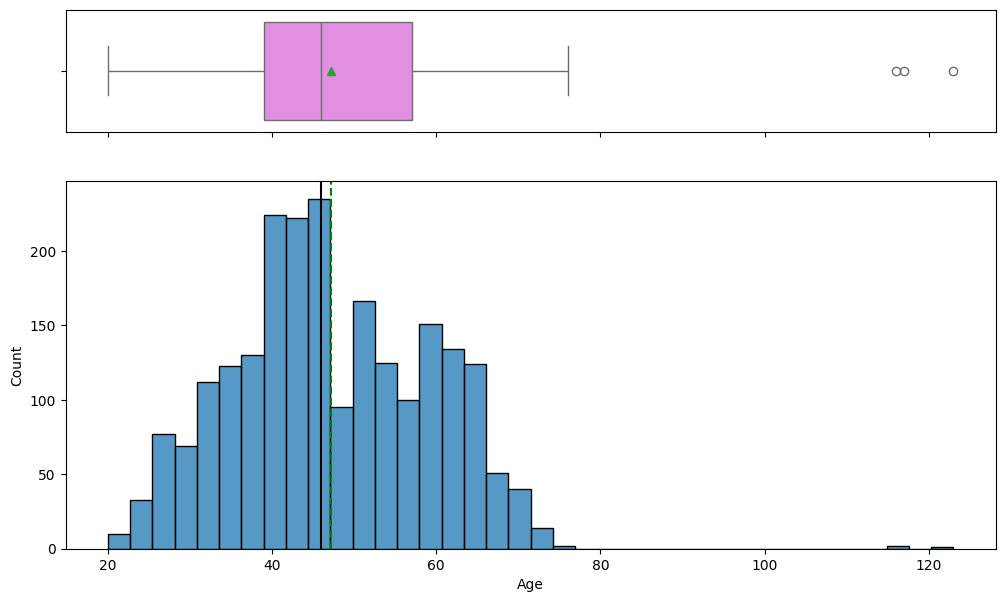

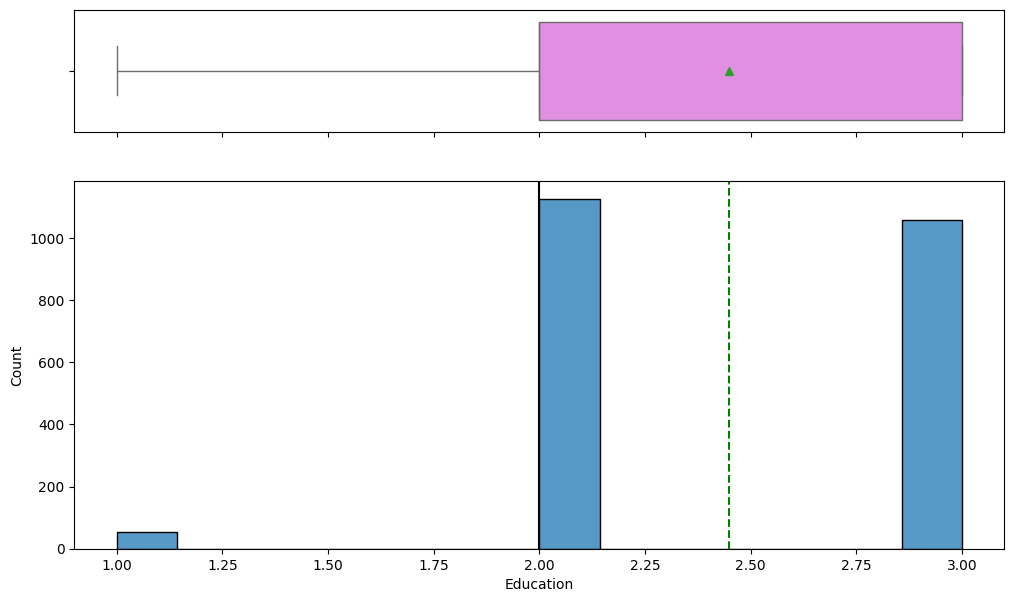

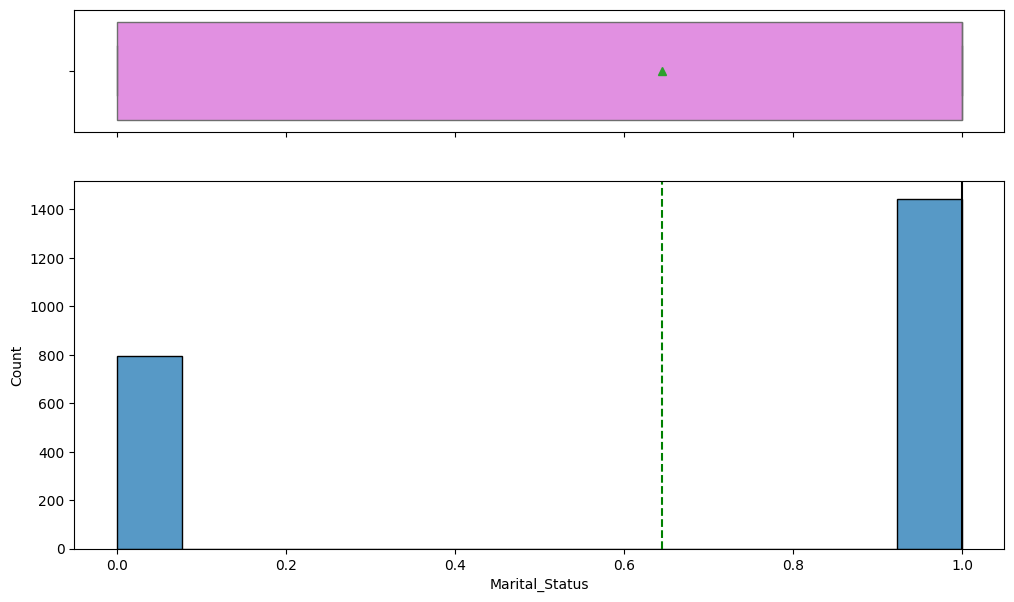

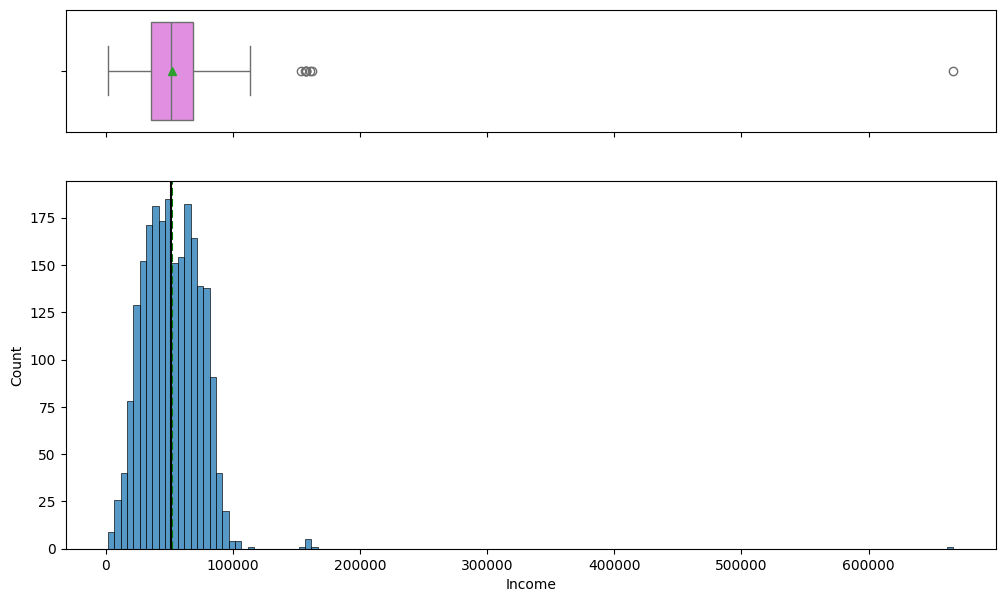

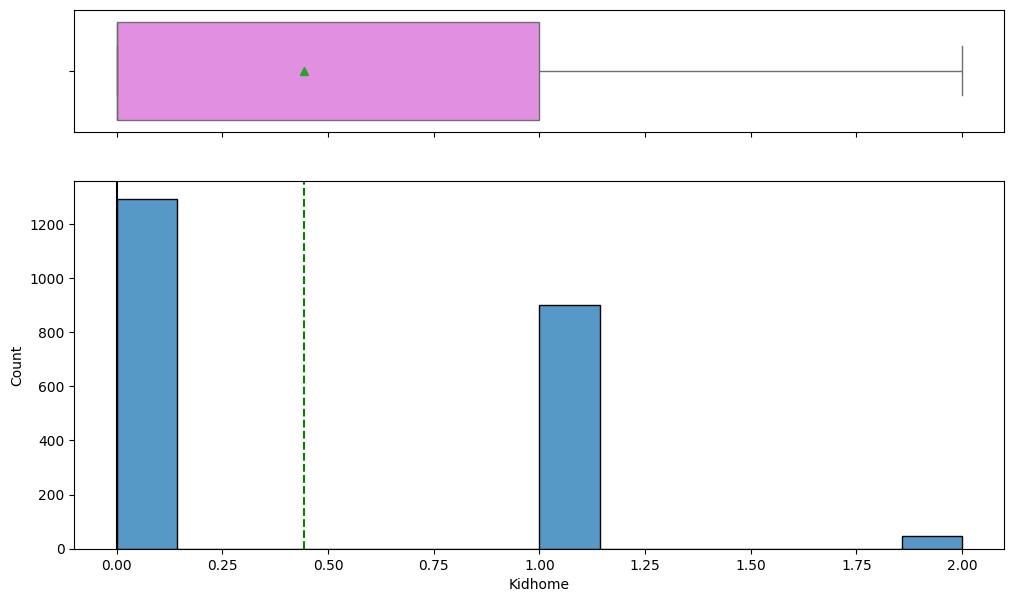

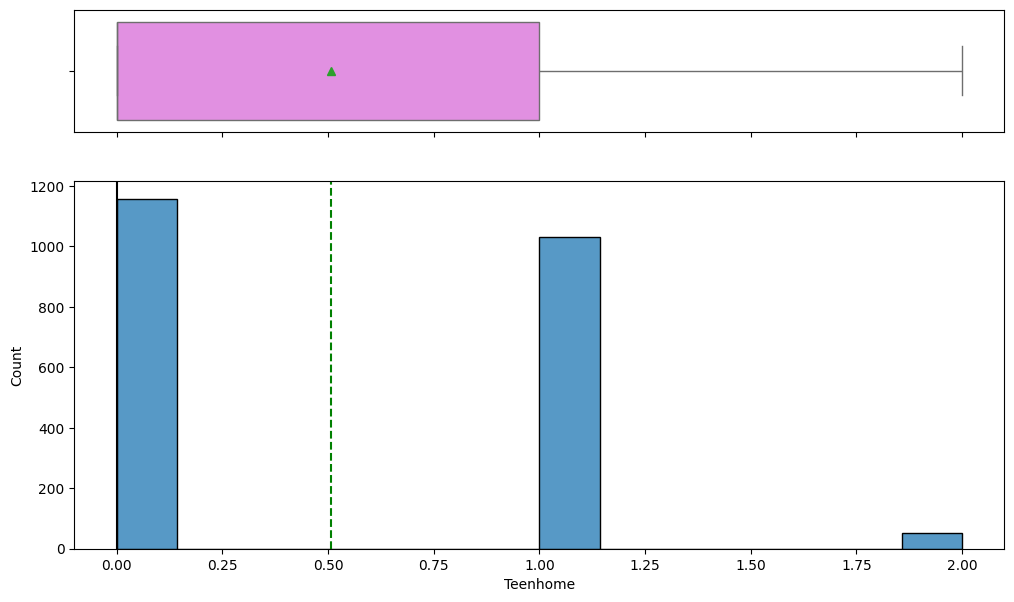

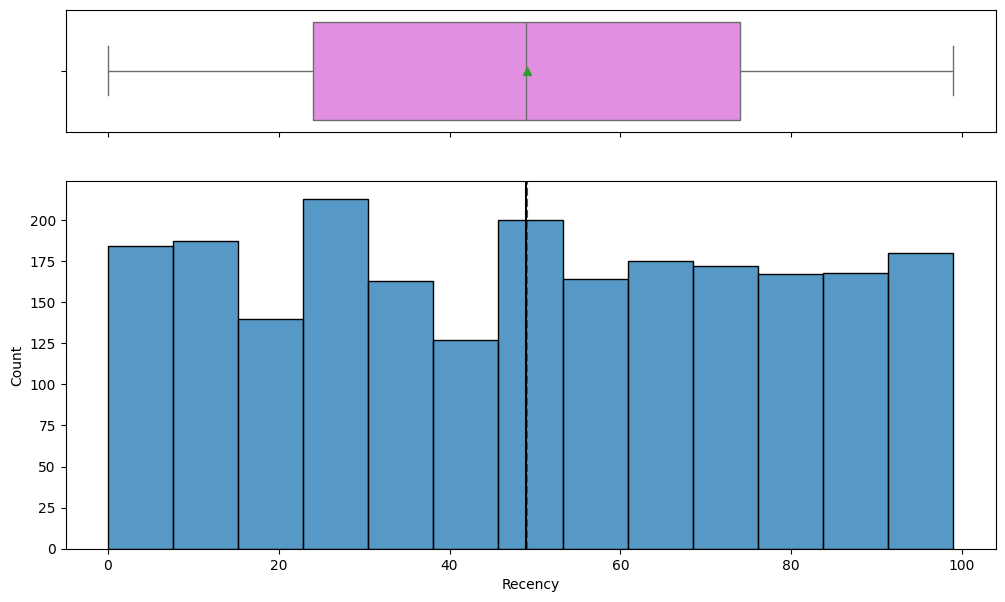

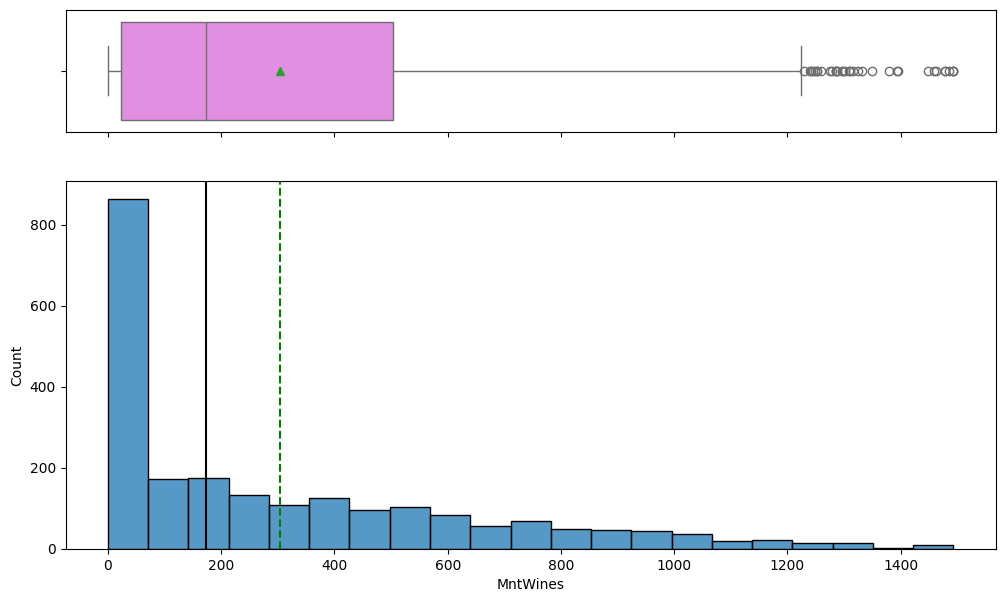

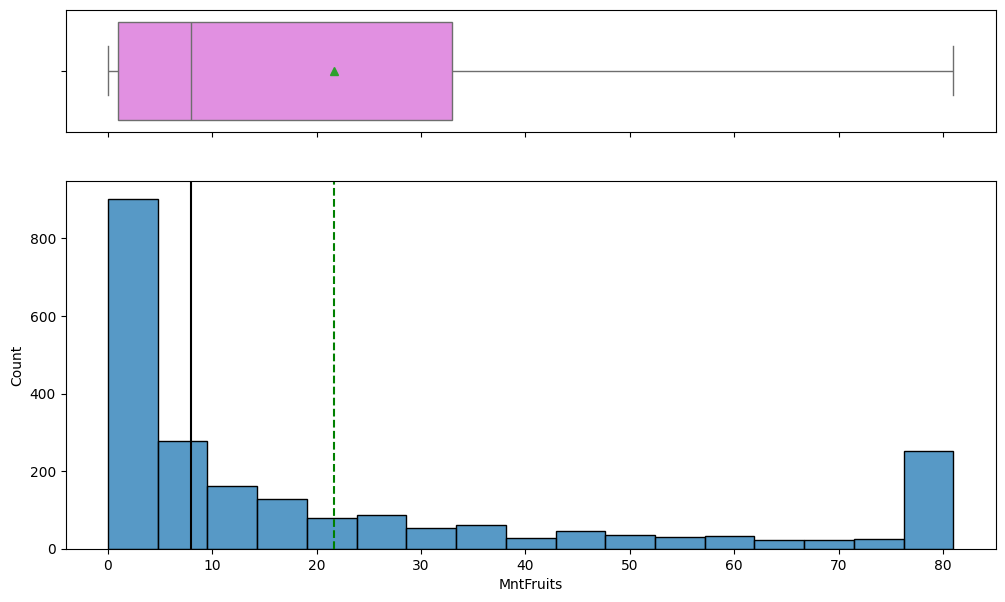

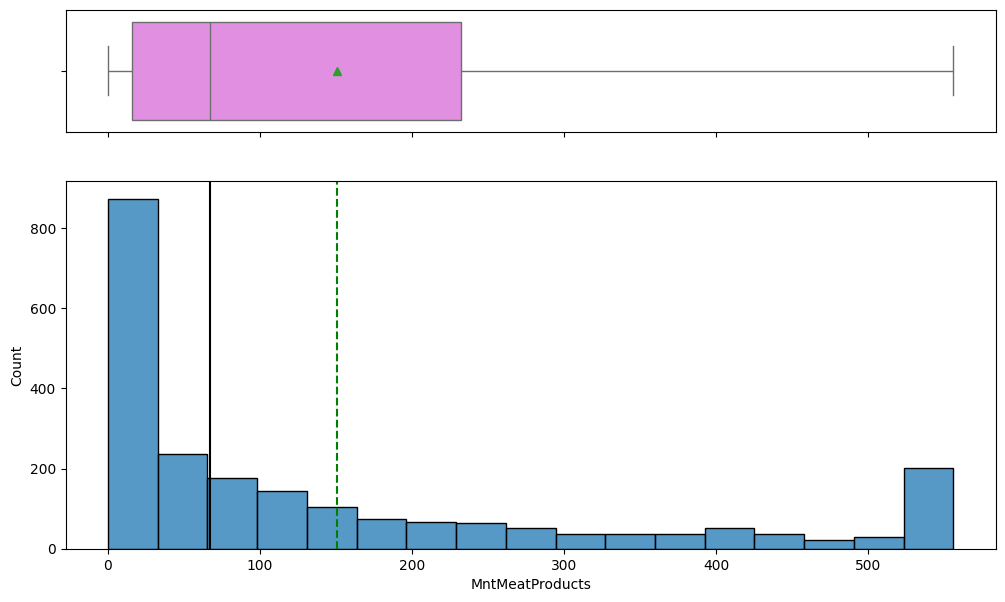

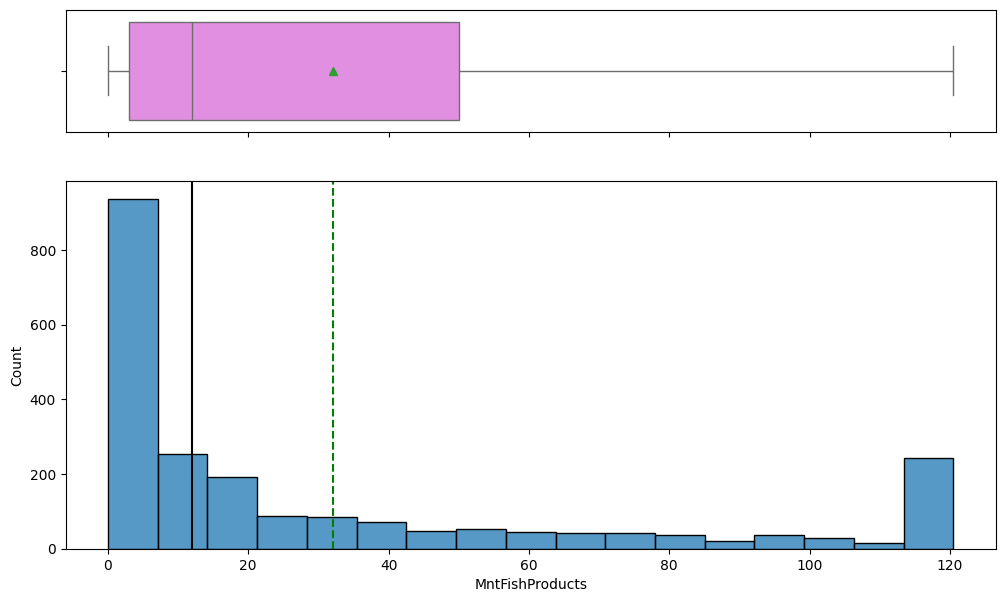

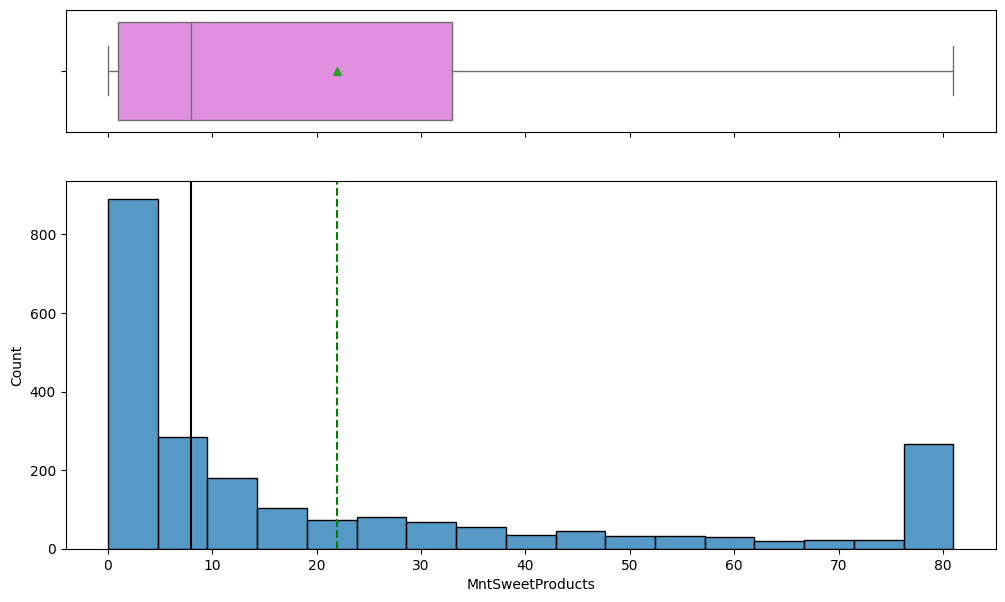

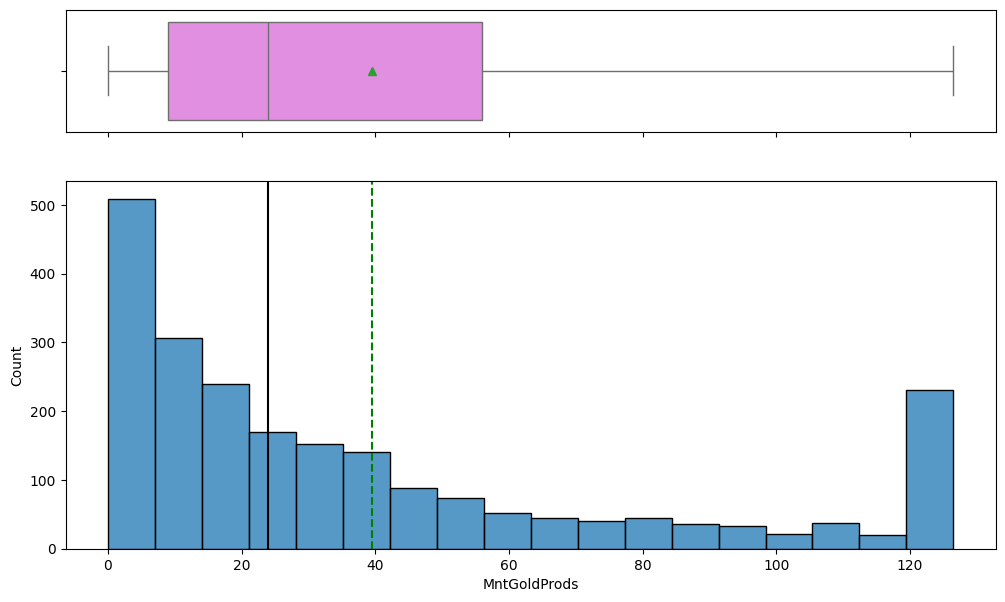

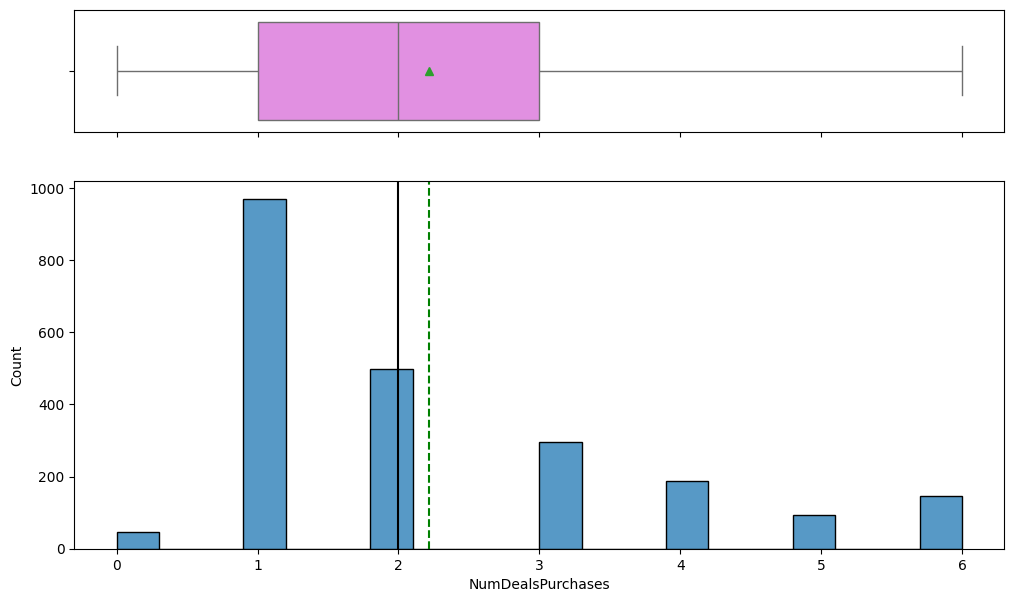

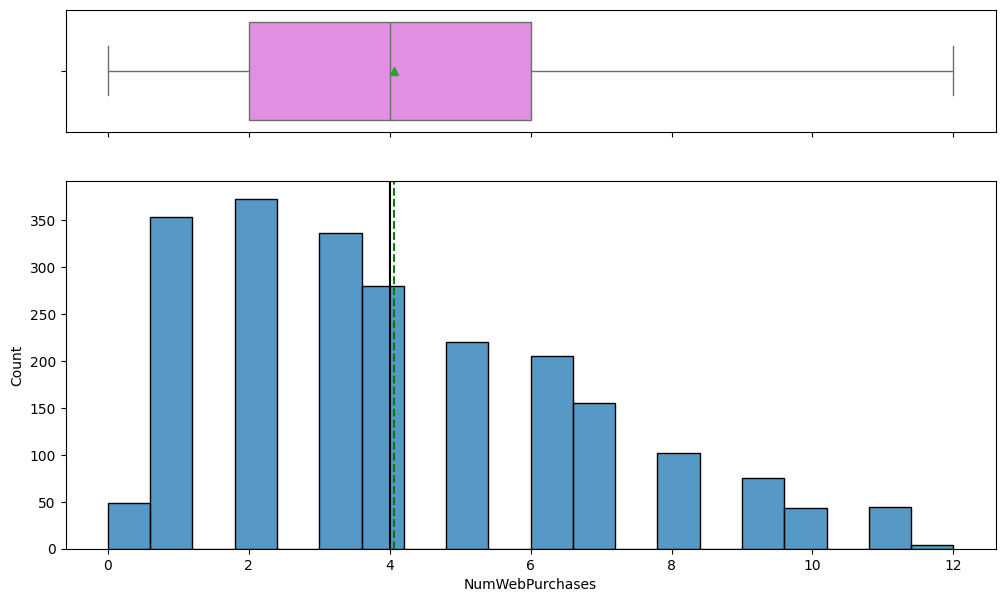

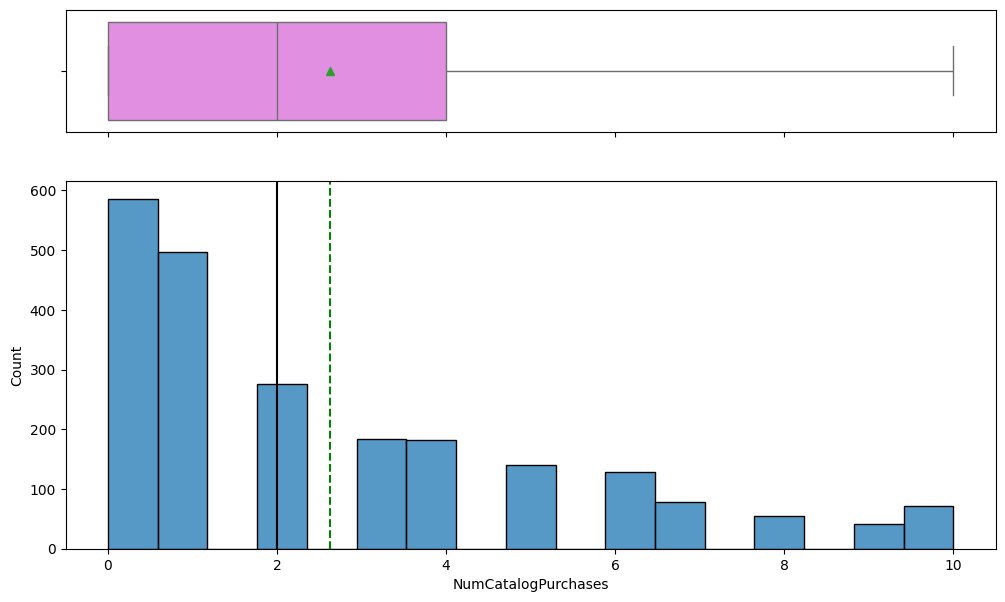

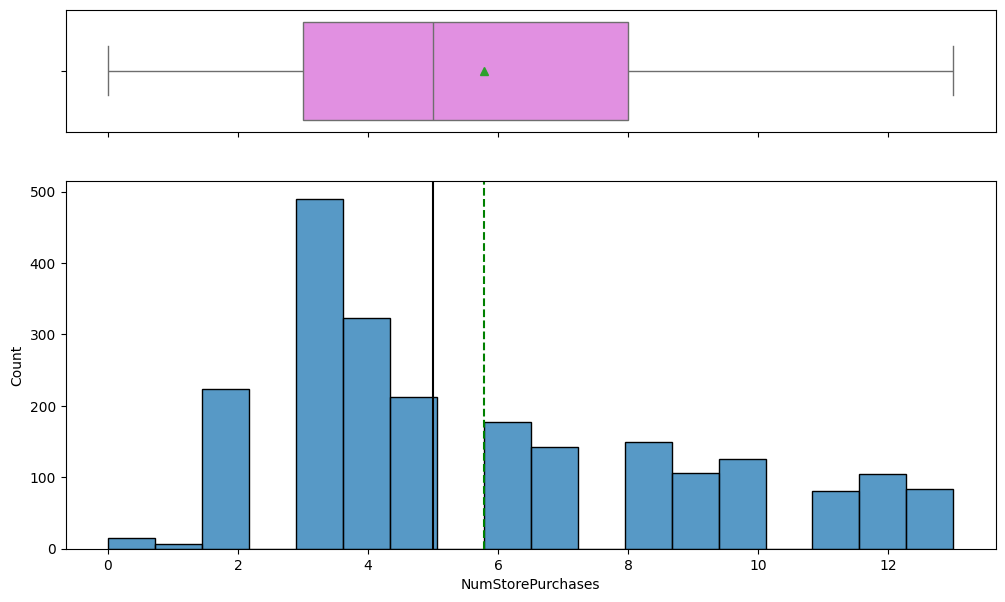

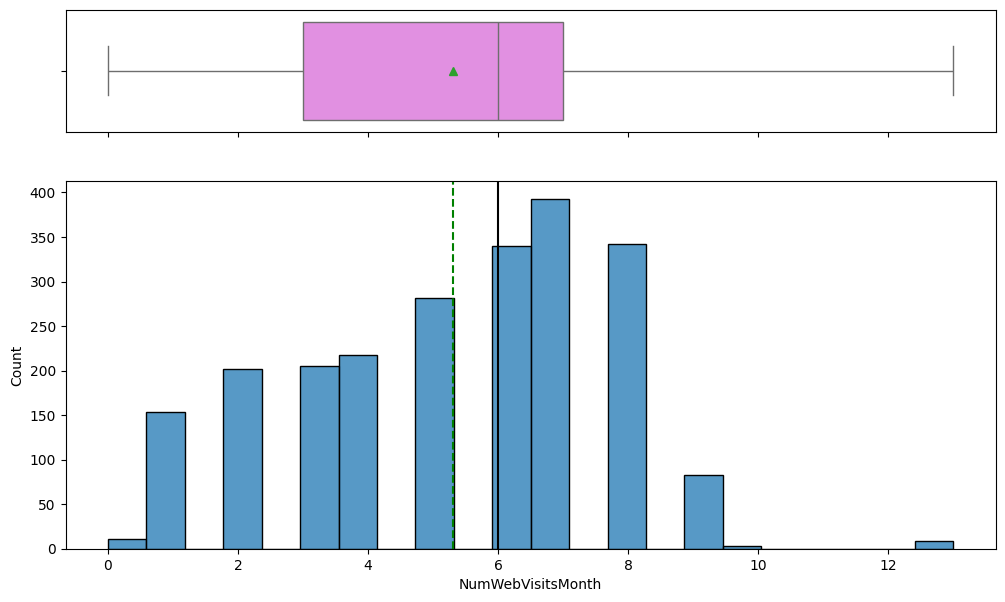

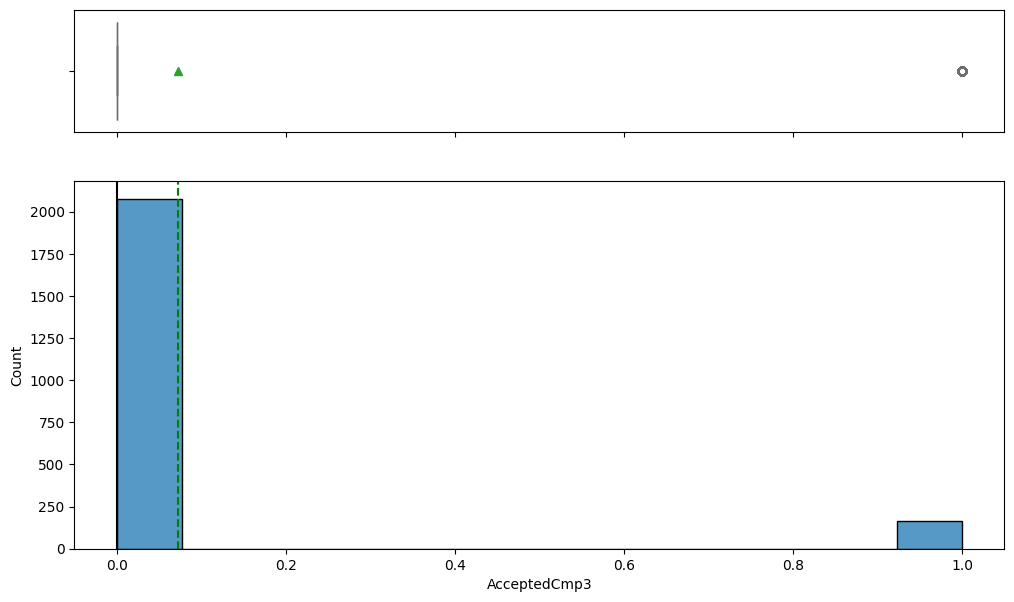

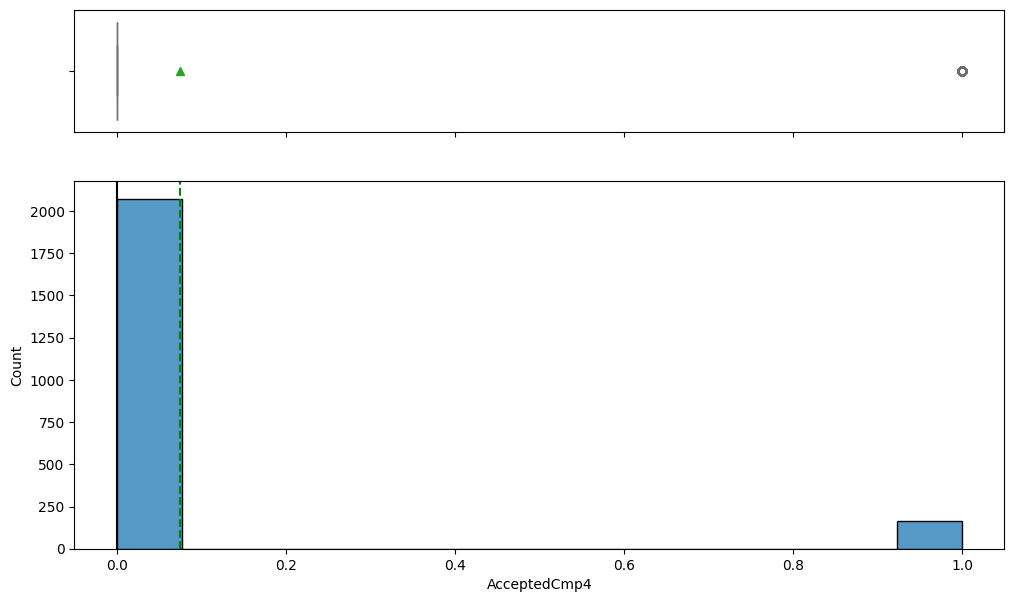

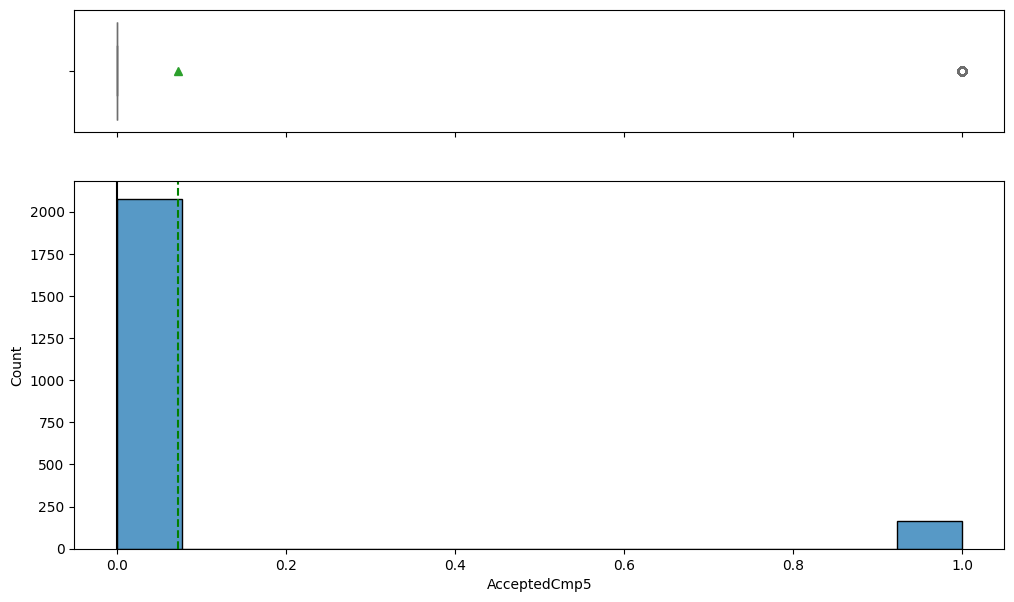

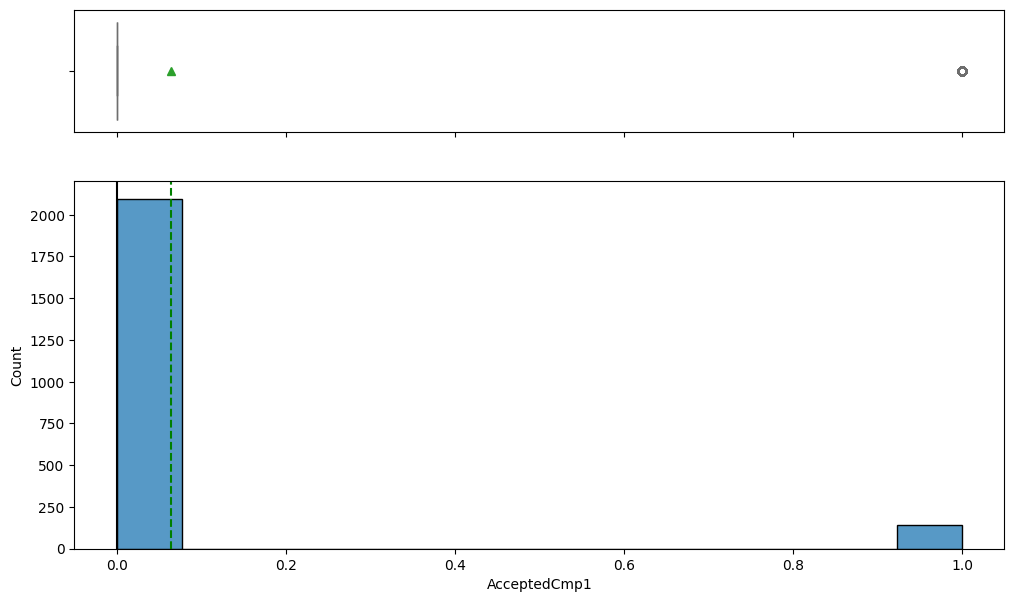

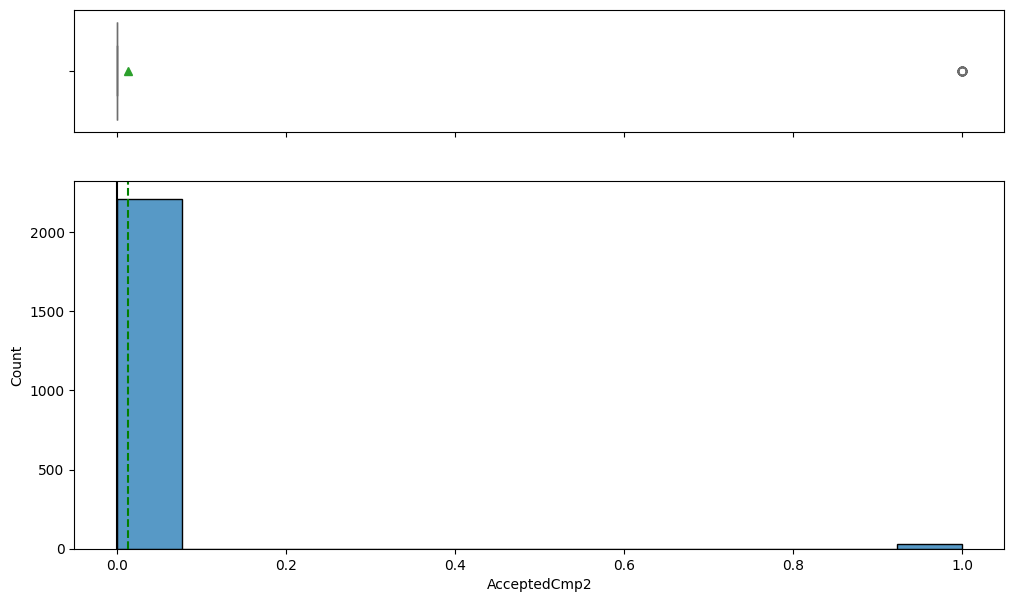

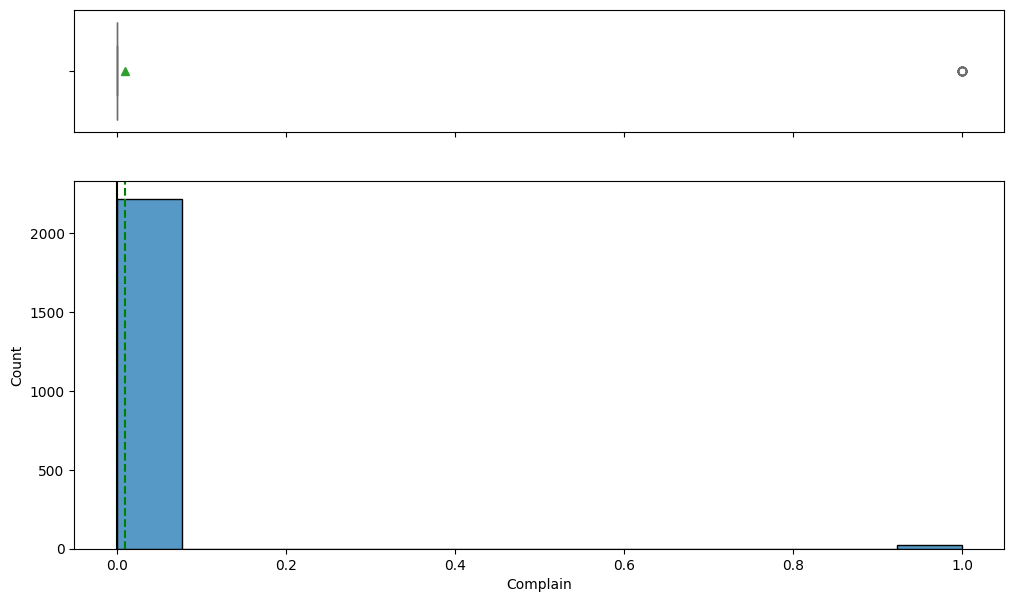

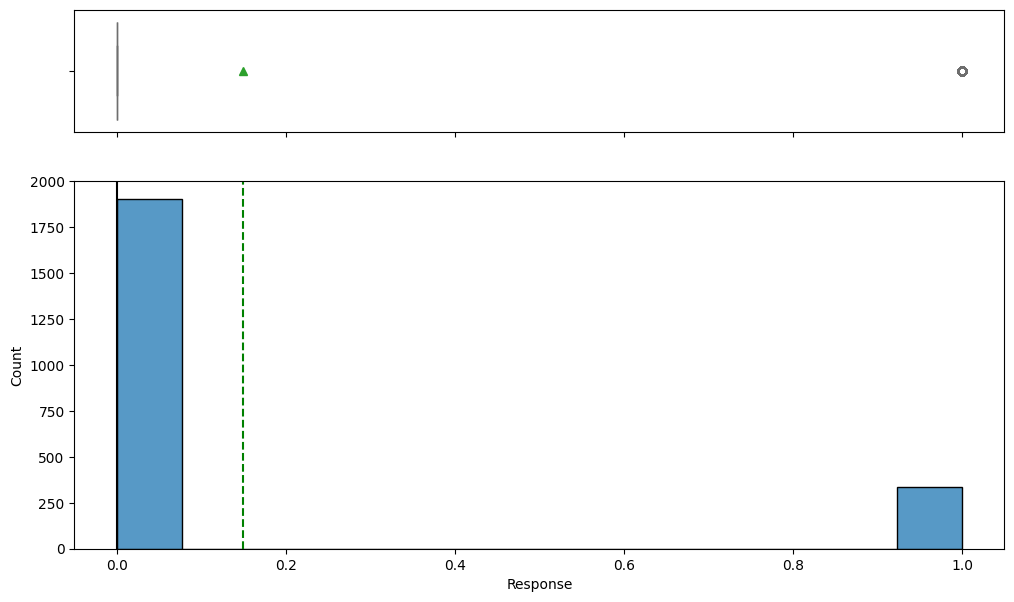

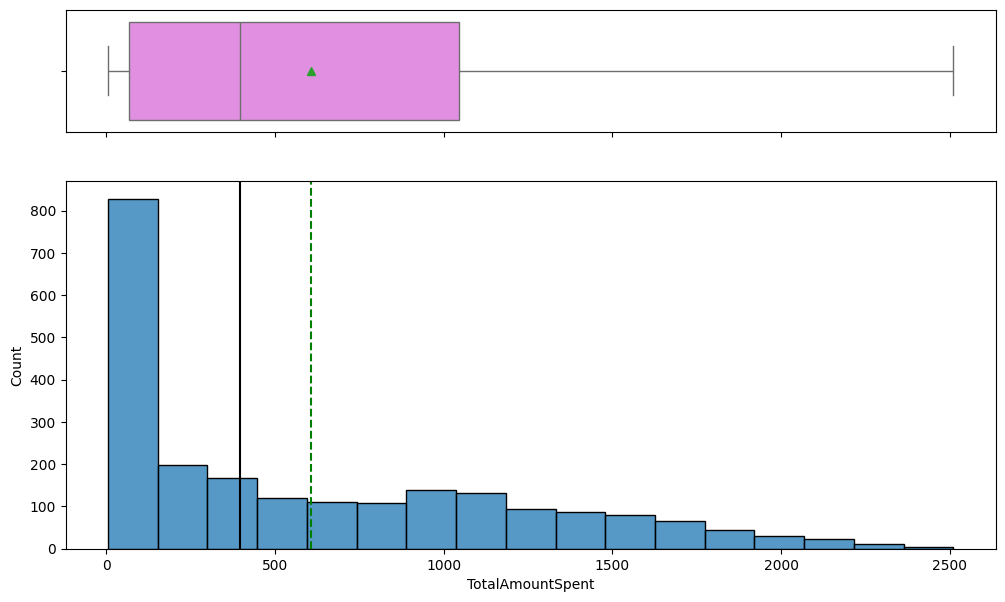

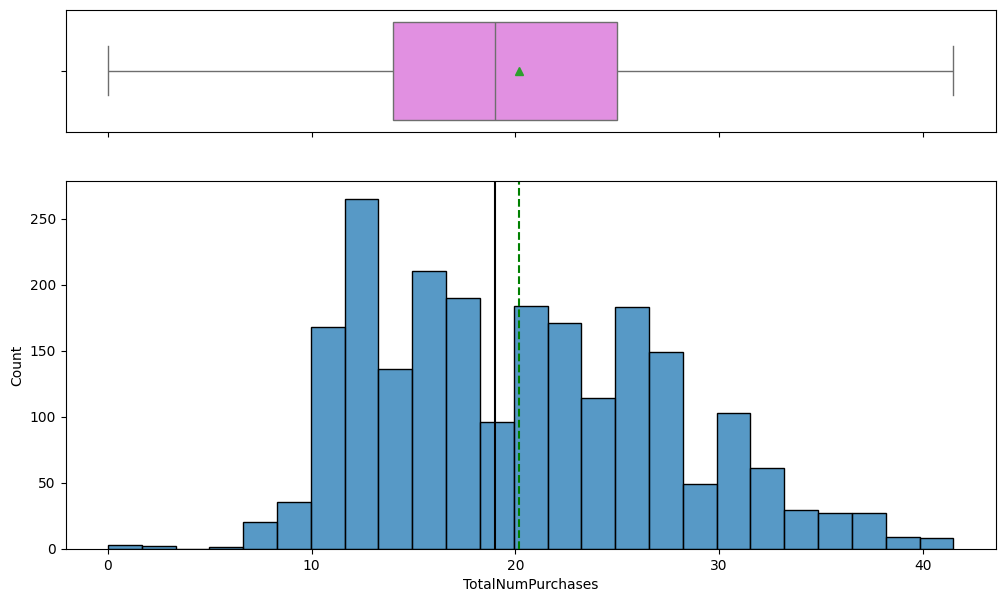

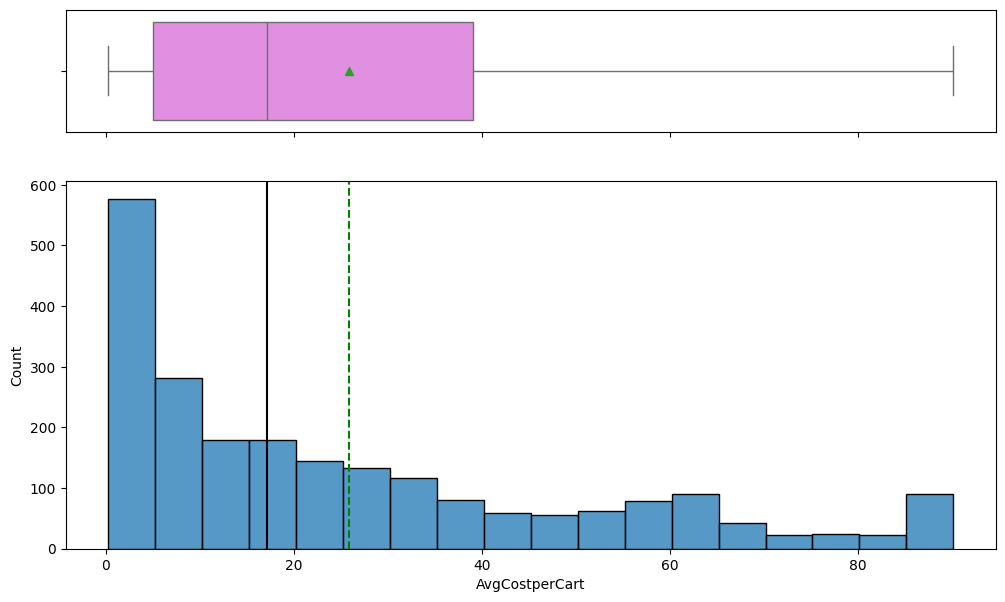

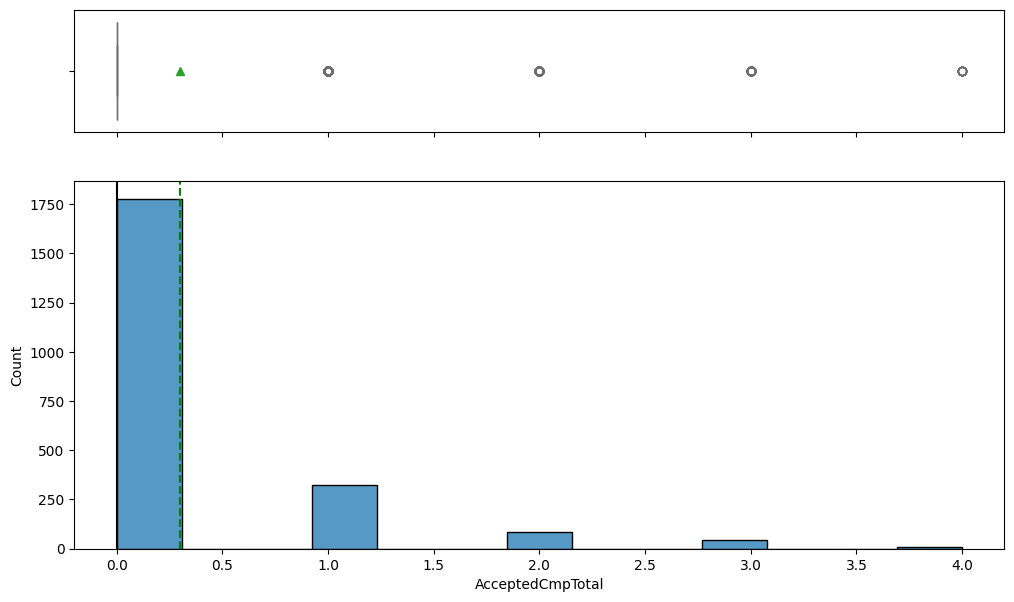

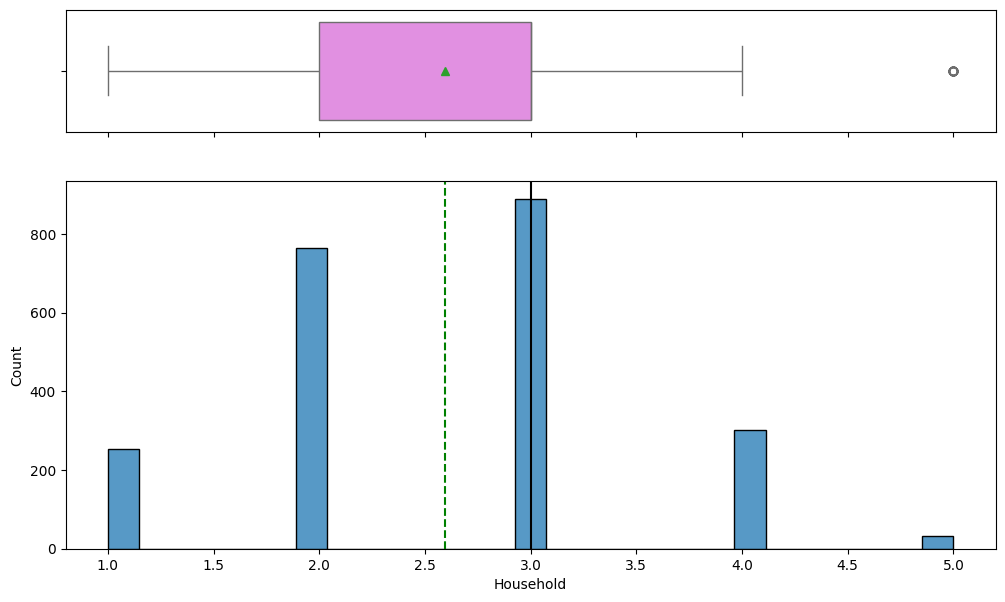

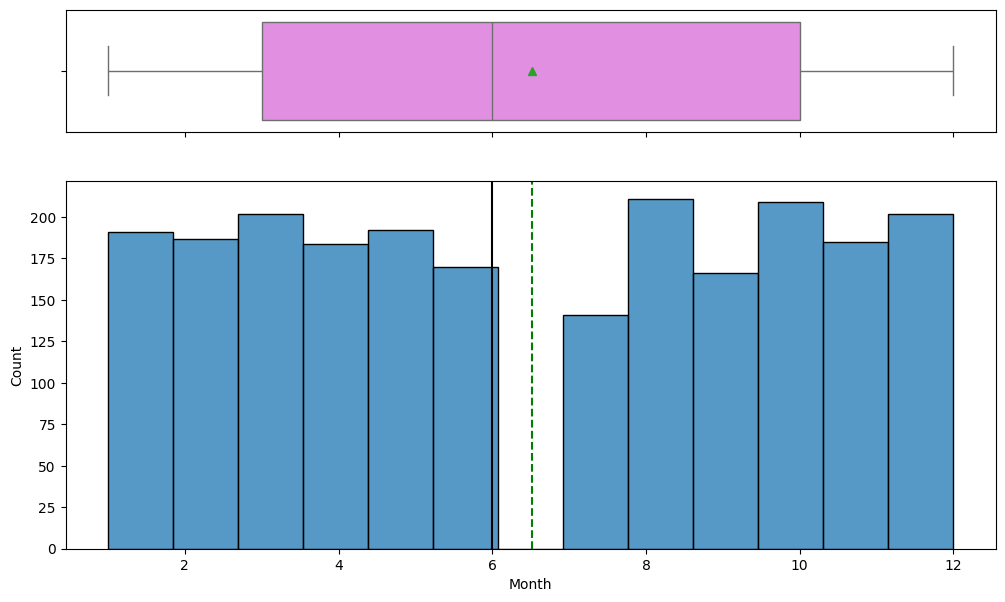

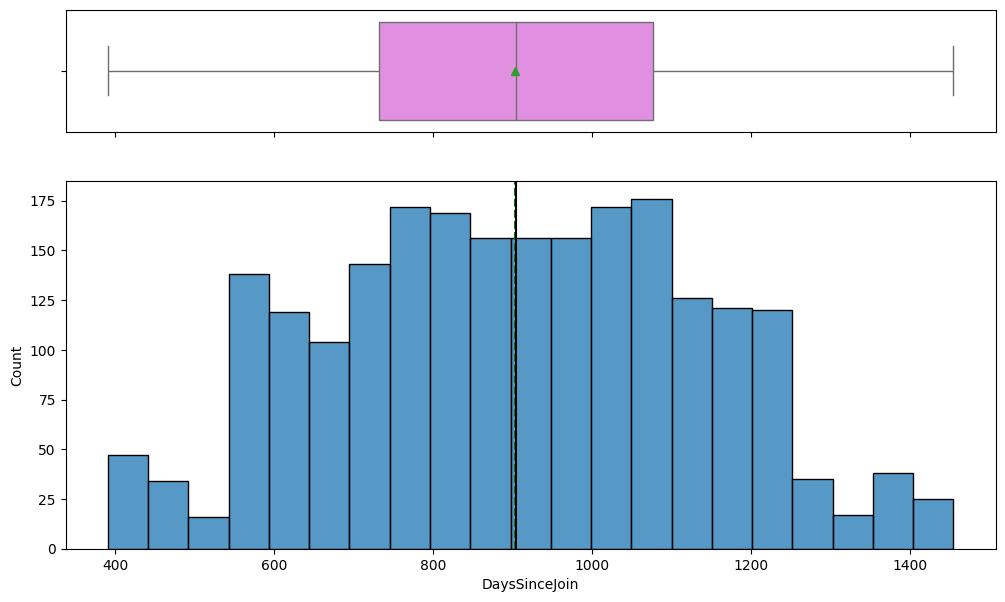

In [193]:
# Check to make sure everything looks normal:

for i in data1.columns:
  histogram_boxplot(data1,i)

#Scale and export to CSV

In [194]:
# PCA, my preselected form of dimensionality reduction will place more emphasis on variables with larger values. In order to make all things even
  # I will scale the data to be on a 0-1 scale

scaled_df = data1.copy()

scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns = data1.columns,index=data1.index)
scaled_df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmountSpent,TotalNumPurchases,AvgCostperCart,AcceptedCmpTotal,Household,Month,DaysSinceJoin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0.378641,0.5,0.0,0.084832,0.0,0.0,0.585859,0.425318,1.000000,0.982014,1.000000,1.000000,0.695652,0.500000,0.666667,1.0,0.307692,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.643352,0.771084,0.559581,0.0,0.00,0.272727,0.913452
2174,0.407767,0.5,0.0,0.067095,0.5,0.5,0.383838,0.007368,0.012346,0.010791,0.016598,0.012346,0.047431,0.333333,0.083333,0.1,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008780,0.265060,0.024697,0.0,0.50,0.636364,0.117592
4141,0.300971,0.5,1.0,0.105097,0.0,0.0,0.262626,0.285332,0.604938,0.228417,0.921162,0.259259,0.332016,0.166667,0.666667,0.2,0.769231,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307708,0.602410,0.342757,0.0,0.25,0.636364,0.444026
6182,0.116505,0.5,1.0,0.037471,0.5,0.0,0.262626,0.007368,0.049383,0.035971,0.082988,0.037037,0.039526,0.333333,0.166667,0.0,0.307692,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019157,0.337349,0.039605,0.0,0.50,0.818182,0.061148
5324,0.145631,1.0,1.0,0.085065,0.5,0.0,0.949495,0.115874,0.530864,0.212230,0.381743,0.333333,0.118577,0.833333,0.416667,0.3,0.461538,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166426,0.578313,0.193016,0.0,0.50,0.000000,0.301976


In [195]:
# Export to CSV:
data1.to_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/NOTScaledCustomerData.csv")
scaled_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/ScaledCustomerData.csv")